## Генерация данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import time

In [2]:
import sys
print(sys.executable)

c:\Python310\python.exe


In [3]:
def generate_linear_data(num_samples=200, noise=0.0, k=-1, b=2, margin=0.5):
    X = []
    y = []
    while len(X) < num_samples:
        point = np.random.uniform(-5, 5, size=2)
        distance = point[1] - (k * point[0] + b)
        
        if distance > margin:
            X.append(point)
            y.append(1)
        elif distance < -margin:
            X.append(point)
            y.append(-1)
    
    X = np.array(X)
    y = np.array(y)
    
    if noise > 0:
        flip_indices = np.random.choice(num_samples, int(noise * num_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    
    return X, y


def generate_nonlinear_data(num_samples=200, noise=0.0, a=2, b=1, margin=0.5):
    num_samples_per_class = num_samples // 2
    X_inner, X_outer = [], []
    
    while len(X_inner) < num_samples_per_class:
        point = np.random.uniform(
            [-a + margin, -b + margin], [a - margin, b - margin]
        )
        distance = (point[0]**2 / (a - margin)**2) + (point[1]**2 / (b - margin)**2)
        if distance < 1:
            X_inner.append(point)
    
    while len(X_outer) < num_samples_per_class:
        point = np.random.uniform([-2*a, -2*b], [2*a, 2*b])
        distance = (point[0]**2 / (a + margin)**2) + (point[1]**2 / (b + margin)**2)
        if distance > 1:
            X_outer.append(point)
    
    X = np.vstack((X_inner, X_outer))
    y = np.hstack((np.ones(len(X_inner)), np.ones(len(X_outer)) * -1))
    
    if noise > 0:
        flip_indices = np.random.choice(num_samples, int(noise * num_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    
    return X, y

In [4]:
def linear_test(n: int):
    k = -1
    b = 2
    margin = 1
    return generate_linear_data(num_samples=n, noise=0.0, k=k, b=b, margin=margin)

def nonlinear_test(n: int):
    a = 3
    b = 2
    margin = 0.5
    return generate_nonlinear_data(num_samples=n, noise=0.0, a=a, b=b, margin=margin)

Прогон:

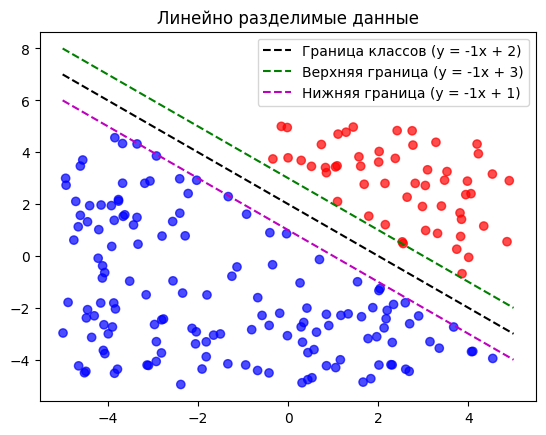

In [12]:
k = -1
b = 2
margin = 1
X_linear, y_linear = generate_linear_data(num_samples=200, noise=0.0, k=k, b=b, margin=margin)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr', alpha=0.7)
x_vals = np.linspace(-5, 5, 100)
y_vals = k * x_vals + b  # y = kx + b
y_top = y_vals + margin
y_bot = y_vals - margin
plt.plot(x_vals, y_vals, 'k--', label=f"Граница классов (y = {k}x + {b})")
plt.plot(x_vals, y_top, 'g--', label=f'Верхняя граница (y = {k}x + {b + margin})')
plt.plot(x_vals, y_bot, 'm--', label=f'Нижняя граница (y = {k}x + {b - margin})')
plt.title("Линейно разделимые данные")
plt.legend()
plt.show()

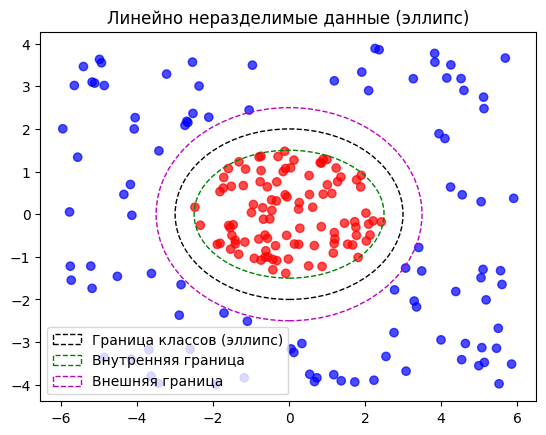

In [13]:
a = 3
b = 2
margin = 0.5
X_nonlinear, y_nonlinear = generate_nonlinear_data(num_samples=200, noise=0.0, a=a, b=b, margin=margin)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='bwr', alpha=0.7)
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, edgecolor='k', facecolor='none', linestyle='--', label="Граница классов (эллипс)")
plt.gca().add_patch(ellipse)
inside = Ellipse(xy=(0, 0), width=2*(a - margin), height=2*(b - margin), edgecolor='g', facecolor='none', linestyle='--', label='Внутренняя граница')
plt.gca().add_patch(inside)
outside = Ellipse(xy=(0, 0), width=2*(a + margin), height=2*(b + margin), edgecolor='m', facecolor='none', linestyle='--', label='Внешняя граница')
plt.gca().add_patch(outside)
plt.title("Линейно неразделимые данные (эллипс)")
plt.legend()
plt.show()

In [14]:
n = 200
point, target = linear_test(n)
fcache = [None] * n

### Спирали

In [5]:
def dim_spirals(n, d, std_dev=0):
    t = np.linspace(0, 4 * np.pi, n)
    
    x = []
    for i in range(2, d + 1, 2):
        if std_dev != 0:
            cos_noise = np.random.normal(0, std_dev, n)
            sin_noise = np.random.normal(0, std_dev, n)
            x.append(t * np.cos(t * i / 2) + cos_noise)
            x.append(t * np.sin(t * i / 2) + sin_noise)
        else:
            x.append(t * np.cos(t * i / 2))
            x.append(t * np.sin(t * i / 2))
    x = np.array(x).T
    # print(f'x shape: {x.shape}')
    labels_x = ['A'] * n
    
    y = []
    for i in range(2, d + 1, 2):
        if std_dev != 0:
            cos_noise = np.random.normal(0, std_dev, n)
            sin_noise = np.random.normal(0, std_dev, n)
            y.append(t * np.cos(t * i / 2 + np.pi) + cos_noise)
            y.append(t * np.sin(t * i / 2 + np.pi) + sin_noise)
        else:
            y.append(t * np.cos(t * i / 2 + np.pi))
            y.append(t * np.sin(t * i / 2 + np.pi))
    y = np.array(y).T
    labels_y = ['B'] * n
    
    points = np.vstack((x, y))
    labels = labels_x + labels_y
    return points, np.array(labels)

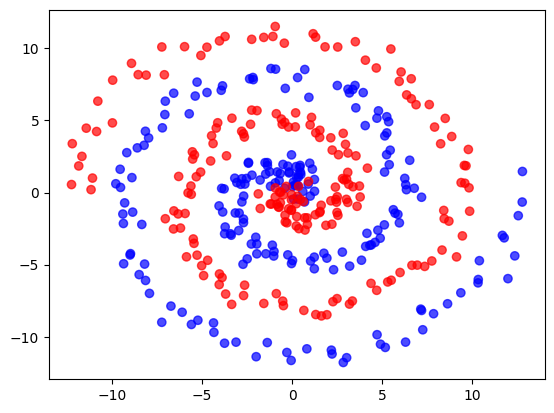

In [6]:
points, labels = dim_spirals(200, 2, 0.5)
colors = ['blue' if label == 'A' else 'red' for label in labels]

plt.scatter(points[:, 0], points[:, 1], c=colors, alpha=0.7)
plt.show()

#### Шаг (совместная оптимизация alpha_1 и alpha_2)

In [15]:
EPS = 10^-6 # ???


def compute_L_H(*args):
    return 0, 0


def obj_f(a2: float):
    return 100


def value_eps_bound(value: float, Lobj: float, L: float, Hobj: float, H: float):
    if Lobj > Hobj + EPS:
        return L
    if Lobj < Hobj - EPS:
        return H
    return value


def take_step(i1: int, i2: int, point: np.ndarray, target: np.ndarray, alpha: np.ndarray, fcache: np.ndarray, kernel, C: float, tol: float):
    if i1 == i2:
        return 0
    alph1, alph2 = alpha[i1], alpha[i2]
    y1, y2 = target[i1], target[i2]
    F1, F2 = fcache[i1], fcache[i2]
    s = y1 * y2
    L, H = compute_L_H()
    if (L == H):
        return 0
    k11 = kernel(point[i1], point[i1])
    k12 = kernel(point[i1], point[i2])
    k22 = kernel(point[i2], point[i2])
    eta = 2 * k12 - k11 - k22
    if eta < 0:
        a2 = alph2 - y2 * (F1 - F2) / eta
        a2 = np.clip(a2, L, H)
    else:
        Lobj = obj_f(a2=L)
        Hobj = obj_f(a2=H)
        a2 = value_eps_bound(alph2, Lobj, L, Hobj, H)
    if np.abs(a2 - alph2) < EPS * (a2 + alph2 + EPS):
        return 0
    a1 = alph1 + s * (alph2 - a2)
    # Update weight vector to reflect change in a1, a2 if linear
    # Update fcache[i] for i in I_0 using new Lagrange
    # Store a1 and a2 in alpha array
    alpha[i1], alpha[i2] = a1, a2
    # update Is
    fcache[i1] = F1 + y1 * (a1 - alph1) * k11 + y2 * (a2 - alph2) * k12
    fcache[i2] = F2 + y1 * (a1 - alph1) * k12 + y2 * (a2 - alph2) * k22
    
    return 1


def take_step_old(i1: int, i2: int, X: np.ndarray, y: np.ndarray, alpha: np.ndarray, fcache: np.ndarray, kernel, C: float, tol: float):
    if i1 == i2:
        return 0
    
    alpha1_old, alpha2_old = alpha[i1], alpha[i2]
    y1, y2 = y[i1], y[i2]
    F1, F2 = fcache[i1], fcache[i2]
    s = y1 * y2
    
    # Compute L and H bounds
    if y1 == y2:
        L = max(0, alpha2_old + alpha1_old - C)
        H = min(C, alpha2_old + alpha1_old)
    else:
        L = max(0, alpha2_old - alpha1_old)
        H = min(C, C + alpha2_old - alpha1_old)
    
    if L == H:
        return 0
    
    # Compute kernel values
    k11 = kernel(X[i1], X[i1])
    k12 = kernel(X[i1], X[i2])
    k22 = kernel(X[i2], X[i2])
    eta = 2 * k12 - k11 - k22
    
    # Update alpha2
    if eta < 0:
        alpha2_new = alpha2_old - y2 * (F1 - F2) / eta
        alpha2_new = np.clip(alpha2_new, L, H)
    else:
        # Evaluate objective at L and H
        alpha2_new = alpha2_old  # Default (no change)
    
    # Clip alpha2_new and compute alpha1_new
    alpha2_new = np.clip(alpha2_new, L, H)
    alpha1_new = alpha1_old + s * (alpha2_old - alpha2_new)
    
    # Update alpha values
    alpha[i1], alpha[i2] = alpha1_new, alpha2_new
    
    # Update fcache for non-boundary examples
    non_bound = (alpha > tol) & (alpha < C - tol)
    for i in np.where(non_bound)[0]:
        fcache[i] += (alpha1_new - alpha1_old) * y1 * kernel(X[i1], X[i]) + \
                     (alpha2_new - alpha2_old) * y2 * kernel(X[i2], X[i])
    
    # Update fcache for i1 and i2
    fcache[i1] = F1 + y1 * (alpha1_new - alpha1_old) * k11 + y2 * (alpha2_new - alpha2_old) * k12
    fcache[i2] = F2 + y1 * (alpha1_new - alpha1_old) * k12 + y2 * (alpha2_new - alpha2_old) * k22
    
    return 1

In [16]:
def examine_example(
    i2: int,
    point: np.ndarray,
    target: np.ndarray,
    alpha: np.ndarray,
    fcache: np.ndarray,
    kernel,
    C: float,
    tol: float,
    i_low: int,
    i_up: int):
    y2 = target[i2]
    alph2 = alpha[i2]
    I_0 = []
    if i2 in I_0:
        F2 = fcache[i2]
    else:
        F2 = 0 # F_i2
        fcache[i2] = F2
        # change
        I_1, I_2, I_3, I_4 = [], [], [], []
        b_up, i_up = 0, 0
        b_low, i_low = 0, 0
        if (i2 in I_1 or i2 in I_2) and F2 < b_up:
            b_up, i_up = F2, i2
        elif (i2 in I_3 or i2 in I_4) and F2 > b_low: 
            b_low, i_low = F2, i2
    optimality = 1
    if i2 in I_0 or i2 in I_1 or i2 in I_2:
        if b_low - F2 > 2 * tol:
            optimality, i1 = 0, i_low
    if i2 in I_0 or i2 in I_3 or i2 in I_4:
        if F2 - b_up > 2 * tol:
            optimality, i1 = 0, i_up
    if optimality == 1:
        return 0
    if i2 in I_0:
        if b_low - F2 > F2 - b_up:
            i1 = i_low
        else:
            i1 = i_up
    return take_step(i1, i2, point, target, alpha, fcache, kernel, C, tol)


def examine_example_old(i2, X, y, alpha, fcache, kernel, C, tol, i_low, i_up):
    y2 = y[i2]
    alpha2 = alpha[i2]
    
    # Update F_i2 if not in cache
    if alpha2 > tol and alpha2 < C - tol:
        F2 = fcache[i2]
    else:
        F2 = np.sum(alpha * y * kernel(X, X[i2])) - y2
        fcache[i2] = F2
    
    # Update b_low and b_up
    if y2 == 1 and alpha2 < C - tol and F2 < fcache[i_up]:
        i_up = i2
    elif y2 == -1 and alpha2 > tol and F2 > fcache[i_low]:
        i_low = i2
    
    # Check optimality
    optimal = True
    if (y2 == 1 and alpha2 > tol) or (y2 == -1 and alpha2 < C - tol):
        if fcache[i_low] - F2 > 2 * tol:
            optimal = False
            i1 = i_low
    if (y2 == -1 and alpha2 > tol) or (y2 == 1 and alpha2 < C - tol):
        if F2 - fcache[i_up] > 2 * tol:
            optimal = False
            i1 = i_up
    
    if optimal:
        return 0
    
    # Choose better i1 if i2 is in I_0
    if alpha2 > tol and alpha2 < C - tol:
        if fcache[i_low] - F2 > F2 - fcache[i_up]:
            i1 = i_low
        else:
            i1 = i_up
    
    # Perform joint optimization (takeStep)
    return take_step(i1, i2, X, y, alpha, fcache, kernel, C, tol)

## Главный цикл

In [17]:
def main_smo_modification_1(X, y, C, kernel, tol=1e-3, max_iter=1000):
    n_samples = X.shape[0]
    alpha = np.zeros(n_samples)
    fcache = np.zeros(n_samples)  
    class1_idx = np.where(y == 1)[0]
    class2_idx = np.where(y == -1)[0]
    
    i_up = class1_idx[0]  
    i_low = class2_idx[0]  
    
    fcache[i_up] = -1
    fcache[i_low] = 1
    
    num_changed = 0
    examine_all = True
    iter_count = 0
    
    while (num_changed > 0 or examine_all) and iter_count < max_iter:
        num_changed = 0
        
        if examine_all:
            for i in range(n_samples):
                num_changed += examine_example(i, X, y, alpha, fcache, kernel, C, tol, i_low, i_up)
        else:
            non_bound_idx = np.where((alpha > tol) & (alpha < C - tol))[0]
            for i in non_bound_idx:
                num_changed += examine_example(i, X, y, alpha, fcache, kernel, C, tol, i_low, i_up)
                
                b_up = np.min(fcache[(alpha > tol) & (alpha < C - tol) & (y == 1)])
                b_low = np.max(fcache[(alpha > tol) & (alpha < C - tol) & (y == -1)])
                if b_up <= b_low + 2 * tol:
                    num_changed = 0
                    break
        
        if examine_all:
            examine_all = False
        elif num_changed == 0:
            examine_all = True
        
        iter_count += 1
    
    sv_idx = np.where(alpha > tol)[0]
    b = np.mean([y[i] - np.sum(alpha * y * kernel(X, X[i])) for i in sv_idx])    
    return alpha, b

In [25]:
import numpy as np

class KeerthiSmo:
    def __init__(self, data, class_labels, C, kernelType = 'linear', tolerance=1e-3, eps=1e-5, maxiter=200):
        if data is None or class_labels is None or C is None:
            raise ValueError("ERROR: Not enough input arguments to instantiate SMO.")
        
        self.x = np.array(data)
        self.y = np.array(class_labels)
        self.C = C
        self.N = len(class_labels)
        self.alpha = np.zeros(self.N)
        self.bias = 0
        self.b_up = -1
        self.b_down = 1
        self.i_up = np.argmax(self.y == 1)
        self.i_down = np.argmax(self.y == -1)
        self.Fcache = np.zeros(self.N)
        self.Fcache[self.i_up] = -1
        self.Fcache[self.i_down] = 1
        self.isSupportVector = np.zeros(self.N, dtype=bool)
        self.kernelType = kernelType
        self.degree = 2
        self.sigma = 1
        self.tolerance = tolerance
        self.eps = eps
        self.iter = 0
        self.maxiter = maxiter
        self.kernelEvaluation = 0

    def kernel(self, x1, x2):
        """
        Calculate the value of the selected kernel type [K(x1, x2)].
        """
        if self.kernelType == 'gaussian':
            ker = np.exp(-np.linalg.norm(x2 - x1)**2 * self.sigma)
        elif self.kernelType == 'polynomial':
            ker = (1 + np.dot(x1, x2))**self.degree
        else:
            ker = np.dot(x1, x2)
        self.kernelEvaluation += 1
        return ker

    def set_kernel(self, kernel_type, *args):
        """
        Set the kernel type and parameters.
        """
        if len(args) > 1:
            raise ValueError("ERROR: Too many input arguments in function setKernel.")
        
        if kernel_type == 'gaussian':
            self.kernelType = 'gaussian'
            if len(args) == 1:
                self.sigma = args[0]
        elif kernel_type == 'polynomial':
            self.kernelType = 'polynomial'
            if len(args) == 1:
                self.degree = args[0]

    def calculate_boundaries(self, i1, i2, alpha_old1, alpha_old2):
        # print(f'Calculating boundaries with {i1 = }, {i2 = }, {alpha_old1 = }, {alpha_old2 = }')
        """
        Return the high (H) and low (L) margins for joint optimization.
        """
        if self.y[i1] != self.y[i2]:
            L = max(0, alpha_old2 - alpha_old1)
            H = min(self.C, self.C + alpha_old2 - alpha_old1)
        else:
            L = max(0, alpha_old2 + alpha_old1 - self.C)
            H = min(self.C, alpha_old2 + alpha_old1)
        return L, H

    def calc_fi(self, i):
        # print(f'Calculating Fi at {i = }')
        """
        Calculate F for the element i.
        """
        res = np.array([self.kernel(self.x[i], self.x[k]) for k in range(self.N)])
        u = np.sum(self.alpha * self.y * res)
        return u - self.y[i]

    def examine_example(self, i1):
        # print(f'in examine_example with {i1 = }')
        """
        Examine an example and search for a second Lagrange multiplier to optimize jointly.
        """
        update = 0
        if 0.0 < self.alpha[i1] < self.C:
            F1 = self.Fcache[i1]
        else:
            F1 = self.calc_fi(i1)
            self.Fcache[i1] = F1

        # Update b_low, i_low or b_up, i_up using (F1, i1)
        if ((self.alpha[i1] == 0.0 and self.y[i1] == 1.0) or 
            (self.alpha[i1] == self.C and self.y[i1] == -1.0)) and (F1 < self.b_up):
            self.b_up = F1
            self.i_up = i1
        elif ((self.alpha[i1] == self.C and self.y[i1] == 1.0) or 
              (self.alpha[i1] == 0.0 and self.y[i1] == -1.0)) and (F1 > self.b_down):
            self.b_down = F1
            self.i_down = i1

        # Check optimality
        optimality = True
        i2 = -1
        if (self.y[i1] == 1.0 and self.alpha[i1] < self.C) or (self.y[i1] == -1.0 and self.alpha[i1] > 0.0):
            # if self.b_down - F1 > self.tolerance + 1e-10:
            if self.b_down - F1 > 2 * self.tolerance:
                optimality = False
                i2 = self.i_down
        if (self.y[i1] == -1.0 and self.alpha[i1] < self.C) or (self.y[i1] == 1.0 and self.alpha[i1] > 0.0):
            # if F1 - self.b_up > self.tolerance + 1e-10:
            if F1 - self.b_up > 2 * self.tolerance:
                optimality = False
                i2 = self.i_up

        if optimality:
            return 0

        # Choose the best index among i_down and i_up
        if 0.0 < self.alpha[i1] < self.C:
            if self.b_down - F1 > F1 - self.b_up + 1e-10:
                i2 = self.i_down
            else:
                i2 = self.i_up

        return self.take_step(i1, i2)

    def take_step(self, i1, i2):
        # print(f'in take_step with {i1 = }, {i2 = }')
        """
        Perform joint optimization of the Lagrange multipliers at indexes i1 and i2.
        """
        if i1 == i2:
            return 0

        s = self.y[i1] * self.y[i2]
        if 0.0 < self.alpha[i1] < self.C:
            F1 = self.Fcache[i1]
        else:
            F1 = self.calc_fi(i1)
            self.Fcache[i1] = F1

        if 0 < self.alpha[i2] < self.C:
            F2 = self.Fcache[i2]
        else:
            F2 = self.calc_fi(i2)
            self.Fcache[i2] = F2

        alpha_old1 = self.alpha[i1]
        alpha_old2 = self.alpha[i2]
        L, H = self.calculate_boundaries(i1, i2, alpha_old1, alpha_old2)

        if L >= H - 1e-10:
            return 0

        k11 = self.kernel(self.x[i1], self.x[i1])
        k12 = self.kernel(self.x[i1], self.x[i2])
        k22 = self.kernel(self.x[i2], self.x[i2])
        eta = 2 * k12 - k11 - k22

        if eta < -1e-10:
            alpha_new2 = alpha_old2 + self.y[i2] * (F2 - F1) / eta
            alpha_new2 = np.clip(alpha_new2, L, H)
        else:
            c1 = eta / 2
            c2 = self.y[i2] * (F1 - F2) - eta * alpha_old2
            Lobj = c1 * L**2 + c2 * L
            Hobj = c1 * H**2 + c2 * H
            if Lobj > Hobj:
                alpha_new2 = L
            elif Lobj < Hobj:
                alpha_new2 = H
            else:
                alpha_new2 = alpha_old2

        if abs(alpha_new2 - alpha_old2) < self.eps:
            return 0

        alpha_new1 = alpha_old1 + s * (alpha_old2 - alpha_new2)
        if alpha_new1 < 0:
            alpha_new2 += s * alpha_new1
            alpha_new1 = 0
        elif alpha_new1 > self.C:
            t = alpha_new1 - self.C
            alpha_new2 += s * t
            alpha_new1 = self.C

        # Round values close to boundaries
        alpha_new1 = np.clip(alpha_new1, 0, self.C)
        alpha_new2 = np.clip(alpha_new2, 0, self.C)

        # Update Lagrange multipliers
        self.alpha[i1] = alpha_new1
        self.alpha[i2] = alpha_new2
        delta_alpha1 = alpha_new1 - alpha_old1
        delta_alpha2 = alpha_new2 - alpha_old2

        # Update Fcache
        for k in range(self.N):
            if 0 < self.alpha[k] < self.C:
                self.Fcache[k] += (self.y[i1] * delta_alpha1 * self.kernel(self.x[i1], self.x[k]) +
                                   self.y[i2] * delta_alpha2 * self.kernel(self.x[i2], self.x[k]))

        self.Fcache[i1] += (self.y[i1] * delta_alpha1 * self.kernel(self.x[i1], self.x[i1]) +
                            self.y[i2] * delta_alpha2 * self.kernel(self.x[i1], self.x[i2]))
        self.Fcache[i2] += (self.y[i1] * delta_alpha1 * self.kernel(self.x[i1], self.x[i2]) +
                            self.y[i2] * delta_alpha2 * self.kernel(self.x[i2], self.x[i2]))

        # Update b_up and b_down
        for k in range(self.N):
            if 0 < self.alpha[k] < self.C or k == i1 or k == i2:
                if self.Fcache[k] < self.b_up:
                    self.b_up = self.Fcache[k]
                    self.i_up = k
                if self.Fcache[k] > self.b_down:
                    self.b_down = self.Fcache[k]
                    self.i_down = k

        return 1

    def train(self):
        print('in train')
        """
        Train the SVM model using the SMO algorithm.
        """
        num_changed = 0
        examine_all = True
        converged = False
        while (num_changed > 0 or examine_all) and self.iter < self.maxiter and not converged:
            num_changed = 0
            self.iter += 1
            if self.iter % 10 == 0:
                print(f'{self.iter = }')
            if examine_all:
                for i1 in range(self.N):
                    num_changed += self.examine_example(i1)
            else:
                for i1 in range(self.N):
                    if 0.0 < self.alpha[i1] < self.C:
                        num_changed += self.examine_example(i1)
                    if self.b_up > self.b_down - 2 * self.tolerance:
                        converged = True
                        break

            examine_all = not examine_all

        # Round Lagrange multipliers close to zero
        self.alpha[np.abs(self.alpha) < 1e-10] = 0
        self.isSupportVector = self.alpha > 0
        print(f'{self.alpha.shape = }')
        self.support_y = self.y[self.alpha > 0]
        self.support_alpha = self.alpha[self.alpha > 0]
        print(f'{self.support_alpha.shape = }')
        self.support_vectors = self.x[self.alpha > 0]
        # Calculate the final bias
        all_bias = np.zeros(self.N)
        for i in range(self.N):
            res = np.array([self.kernel(self.x[i], self.x[k]) for k in range(self.N) if self.alpha[k] > 0])
            all_bias[i] = self.y[i] - np.sum(self.support_y * self.support_alpha * res)
        self.bias = np.mean(all_bias)

    def predict(self, data):
        n = data.shape[0]
        output = np.zeros(n)
        if data.shape[1] != self.x.shape[1]:
            raise ValueError("Data provided for evaluation and training differ in dimension!")

        for i in range(n):
            res = np.array([self.kernel(self.x[k], data[i]) for k in range(self.N) if self.alpha[k] > 0])
            output[i] = np.sum(self.support_alpha * self.support_y * res) + self.bias
            output[i] = 1 if output[i] > 0 else -1

        return output

    def decision_function(self, data):
        n = data.shape[0]
        output = np.zeros(n)
        if data.shape[1] != self.x.shape[1]:
            raise ValueError("Data provided for evaluation and training differ in dimension!")

        for i in range(n):
            res = np.array([self.kernel(self.x[k], data[i]) for k in range(self.N) if self.alpha[k] > 0])
            output[i] = np.sum(self.support_alpha * self.support_y * res) + self.bias
            # output[i] = 1 if output[i] > 0 else -1

        return output

### Настройки

In [17]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


def plot_data_sk(sk_model, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Use decision_function to get the decision boundary
    Z = sk_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Use custom blue-ish and red-ish colors
    ax.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, 
                colors=['#2ab7ca', '#f694c1'])  # Light blue and light pink
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    ax.contour(xx, yy, Z, levels=[-1, 1], colors='gray', linewidths=1.5, linestyles='--')
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7, s=60)
    ax.scatter(sk_model.support_vectors_[:, 0], sk_model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='g', label='Support Vectors')
    
    acc = sk_model.score(X, y)
    ax.text(0.05, 0.95, f"Acc: {acc*100:.1f}%", 
            transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.set_title(title)

def plot_data_smo(smo, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Use decision_function to get the decision boundary
    Z = smo.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Use custom blue-ish and red-ish colors
    ax.contourf(xx, yy, Z, levels=[-np.inf, 0, np.inf], alpha=0.2, 
                colors=['#2ab7ca', '#f694c1'])  # Light blue and light pink
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    ax.contour(xx, yy, Z, levels=[-1, 1], colors='gray', linewidths=1.5, linestyles='--')
    
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.7, s=60)
    ax.scatter(smo.support_vectors[:, 0], smo.support_vectors[:, 1],
               s=100, facecolors='none', edgecolors='g', label='Support Vectors')
    
    y_pred = smo.predict(X)
    acc = np.mean(y_pred == y)
    ax.text(0.05, 0.95, f"Acc: {acc*100:.1f}%", 
            transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.set_title(title)

In [19]:
iris = load_iris()
X1 = iris.data[iris.target != 2, :2]  # Берем первые два класса и два признака
y1 = iris.target[iris.target != 2]
y1 = np.where(y1 == 0, -1, 1)
X2, y2 = make_circles(random_state=42)
y2 = np.where(y2 == 0, -1, 1)
X3, y3 = make_moons(n_samples=200, noise=0.1, random_state=42)
y3 = np.where(y3 == 0, -1, 1)
X4, y4 = dim_spirals(100, 2, 0.5)
y4 = np.where(y4 == 'A', -1, 1)
datasets = [(X4, y4, 'Spirals'),
            (X1, y1, 'Iris'), 
            (X2, y2, 'Circles'), 
            (X3, y3, 'Moons'),
            ]

In [20]:
svm_linear = [0.01, 0.05, 1]  # C
svm_gaussian = [(0.01, 0.5), (0.01, 1), (0.03, 2)]  # (C, sigma)
svm_poly = [(0.01, 4), (0.05, 4), (0.01, 5), (0.05, 5)] # (C, degree)

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (12,)


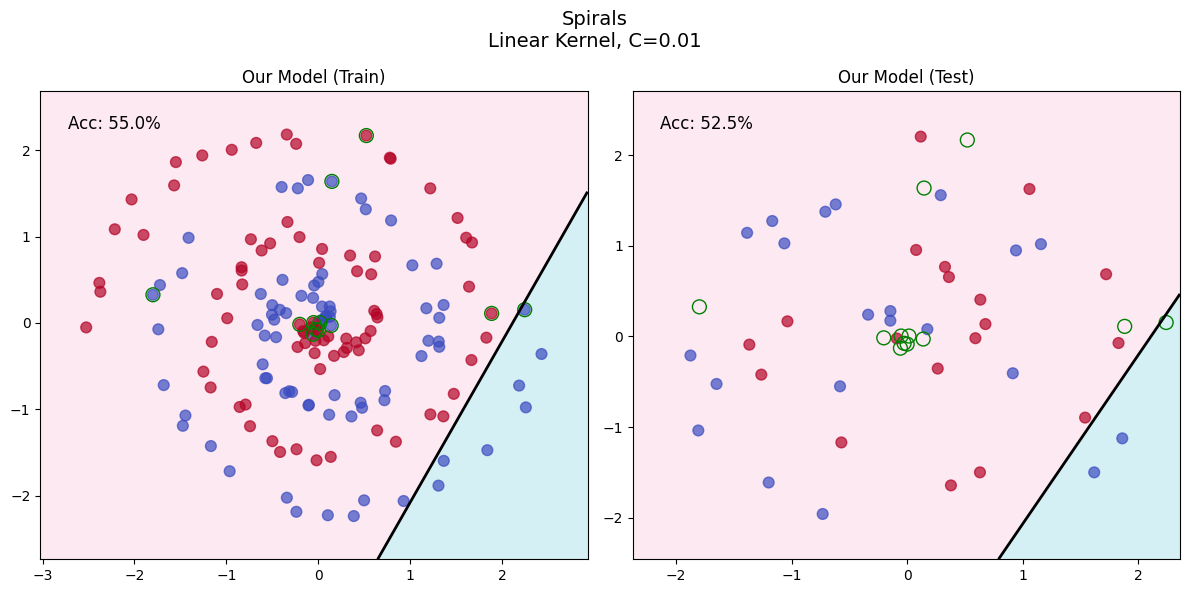

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (12,)


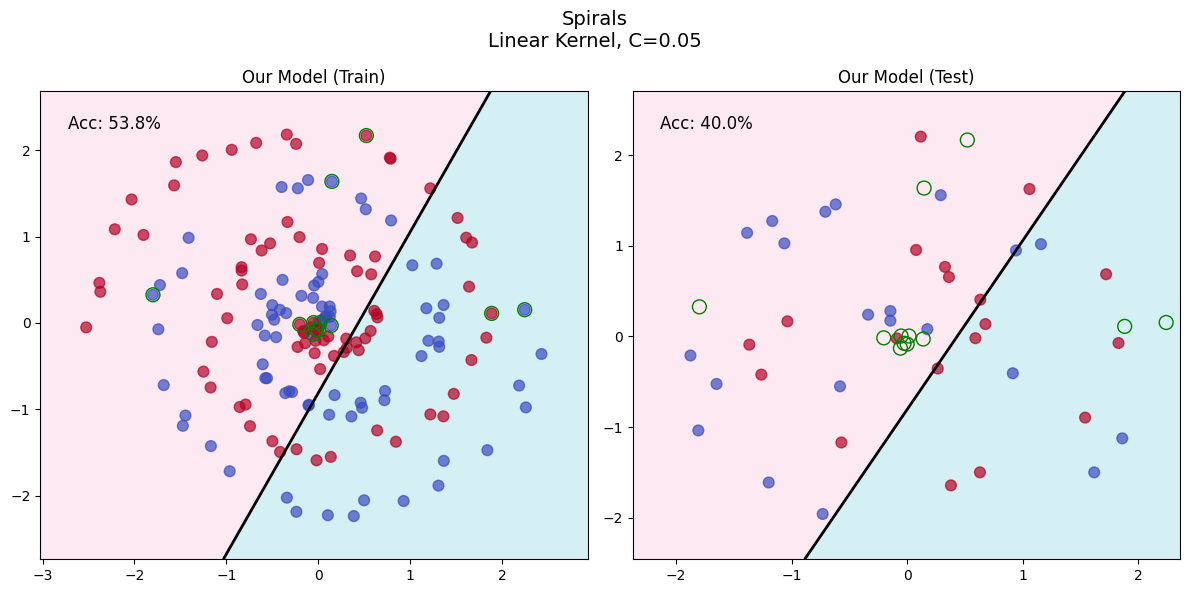

in train
self.iter = 10
self.alpha.shape = (160,)
self.support_alpha.shape = (17,)


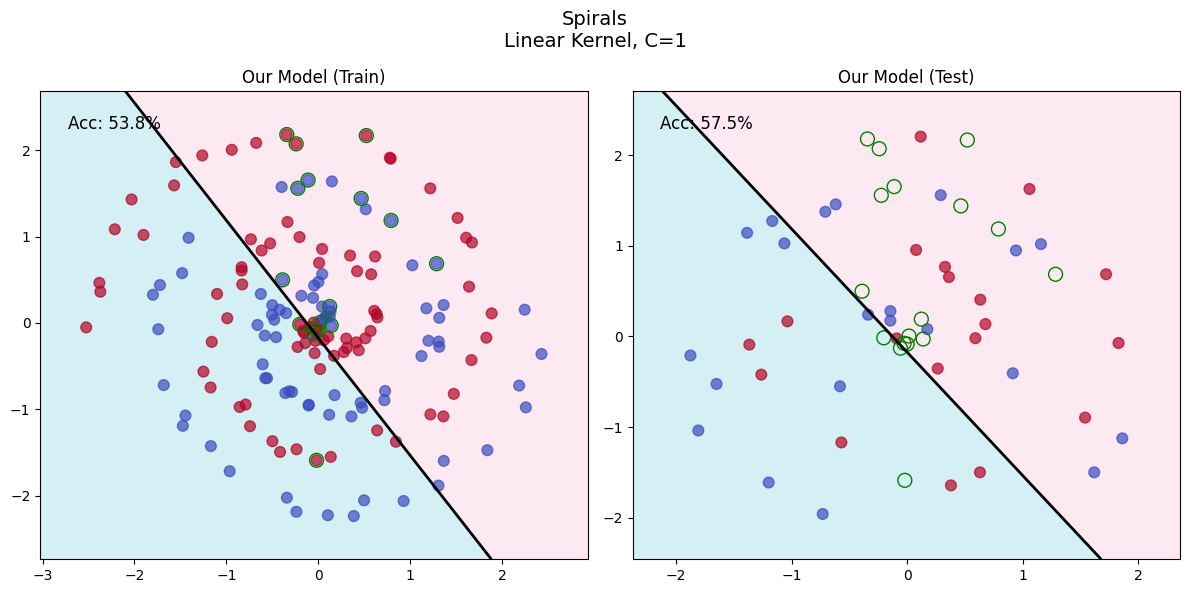

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (6,)


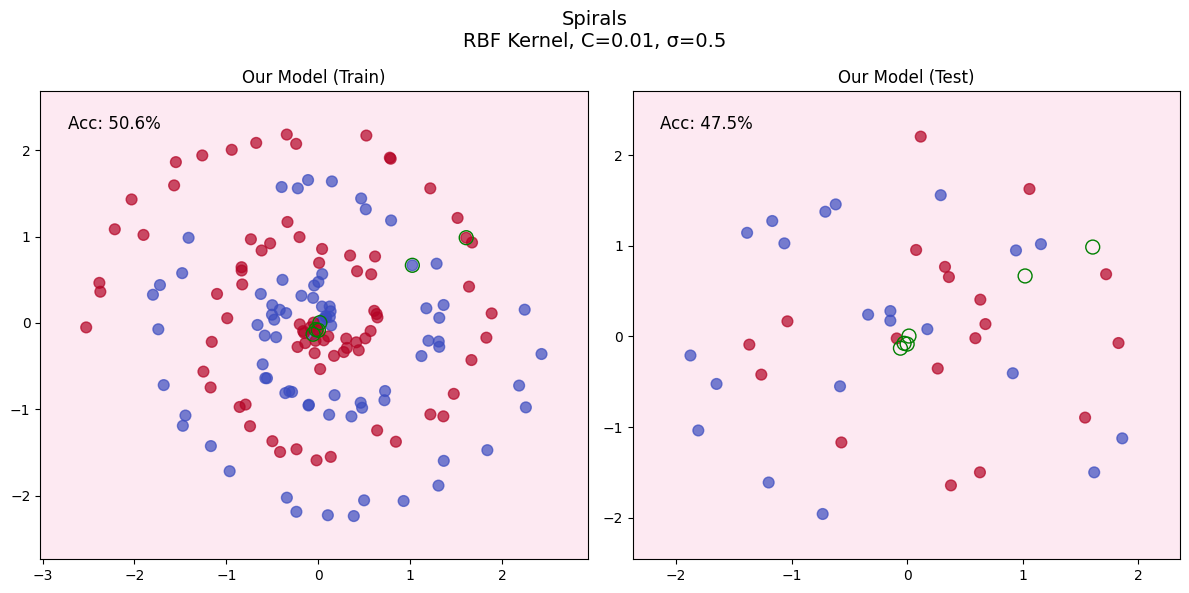

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (6,)


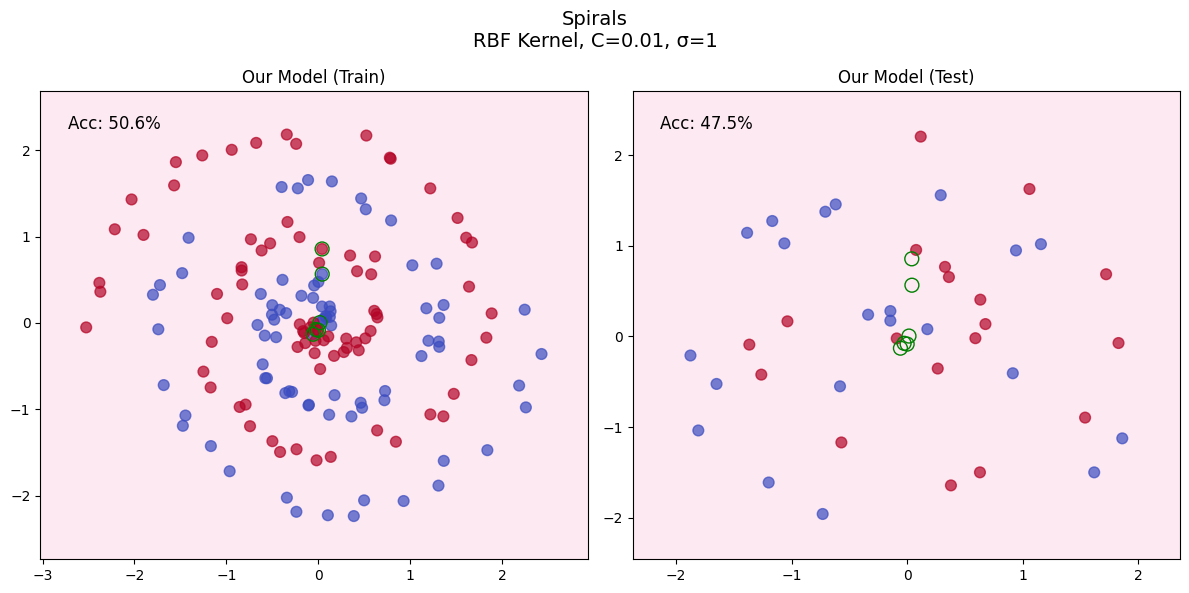

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (12,)


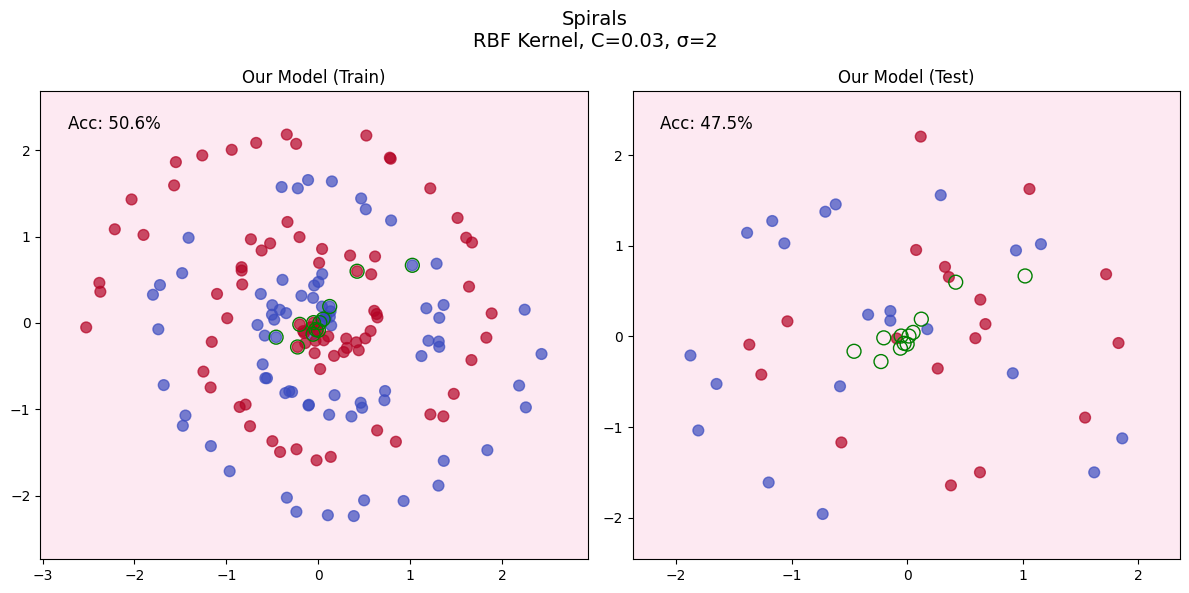

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (2,)


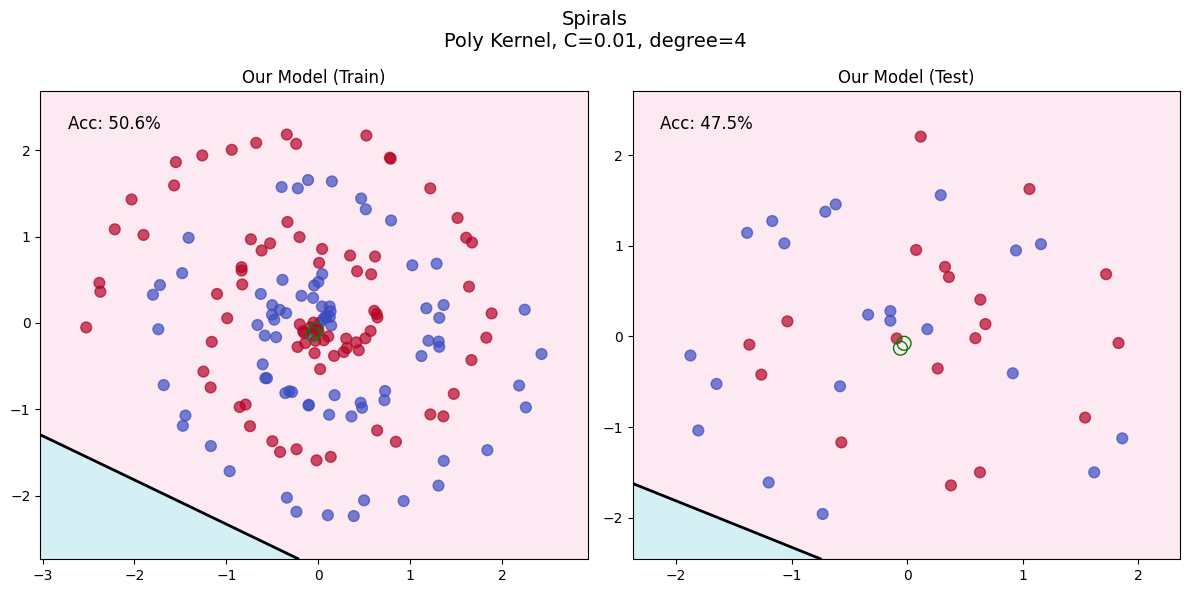

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (2,)


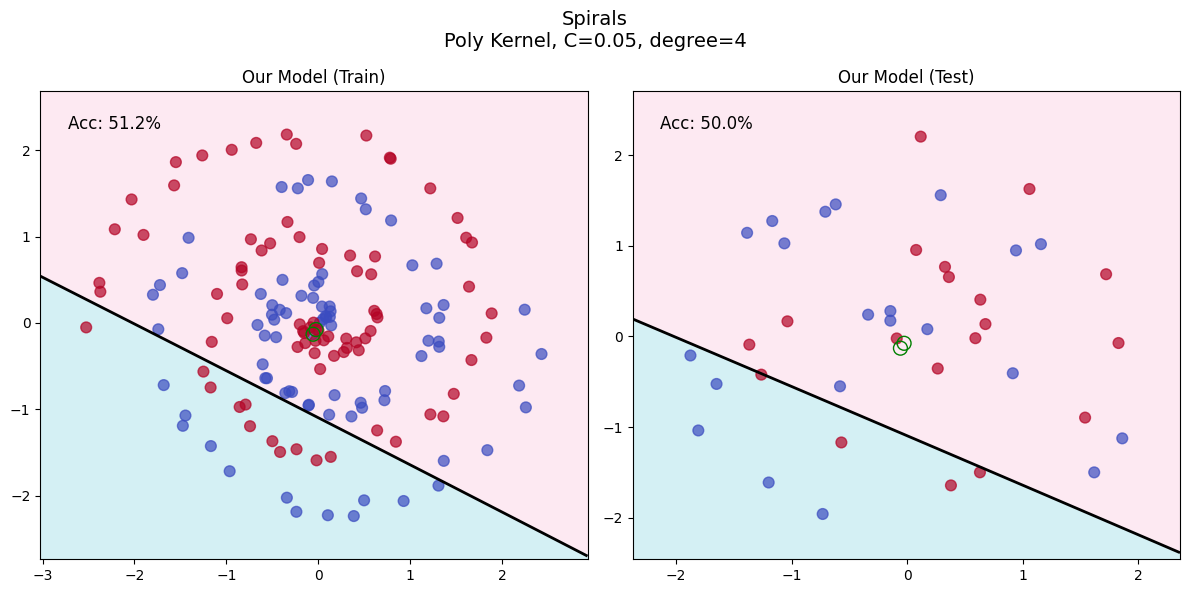

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (2,)


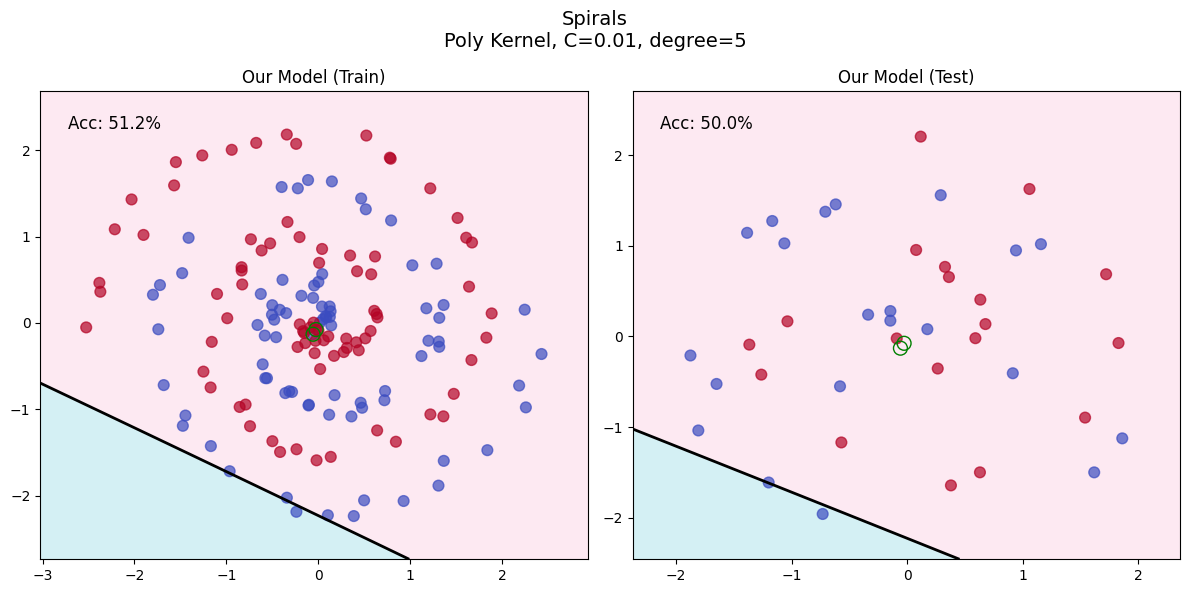

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (2,)


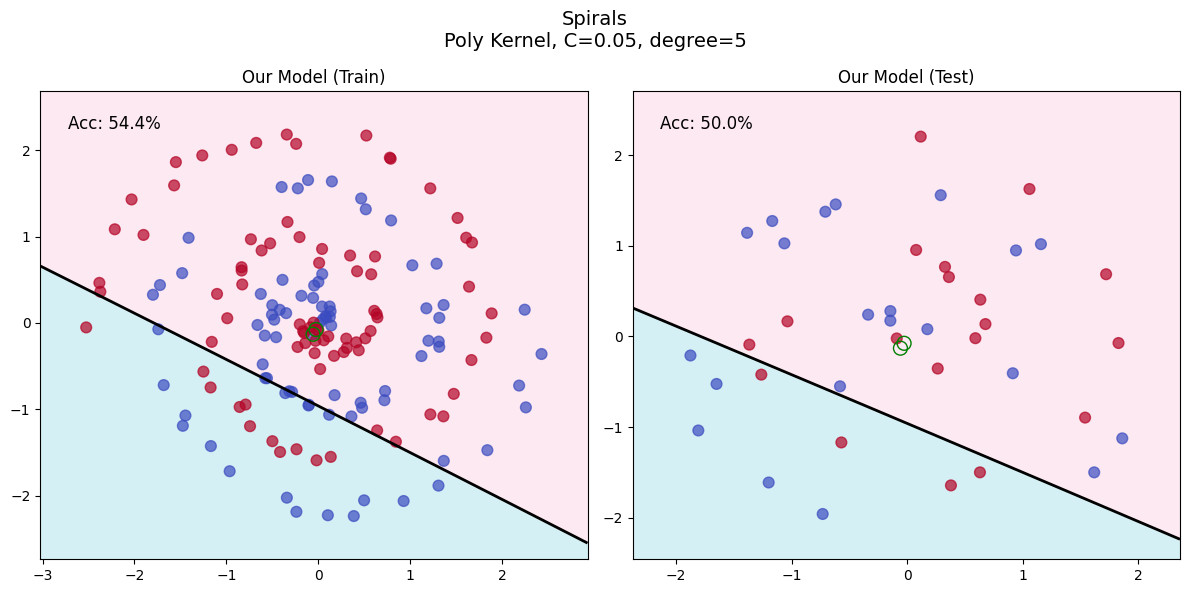

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (8,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (8,)
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (16,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (11,)
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 

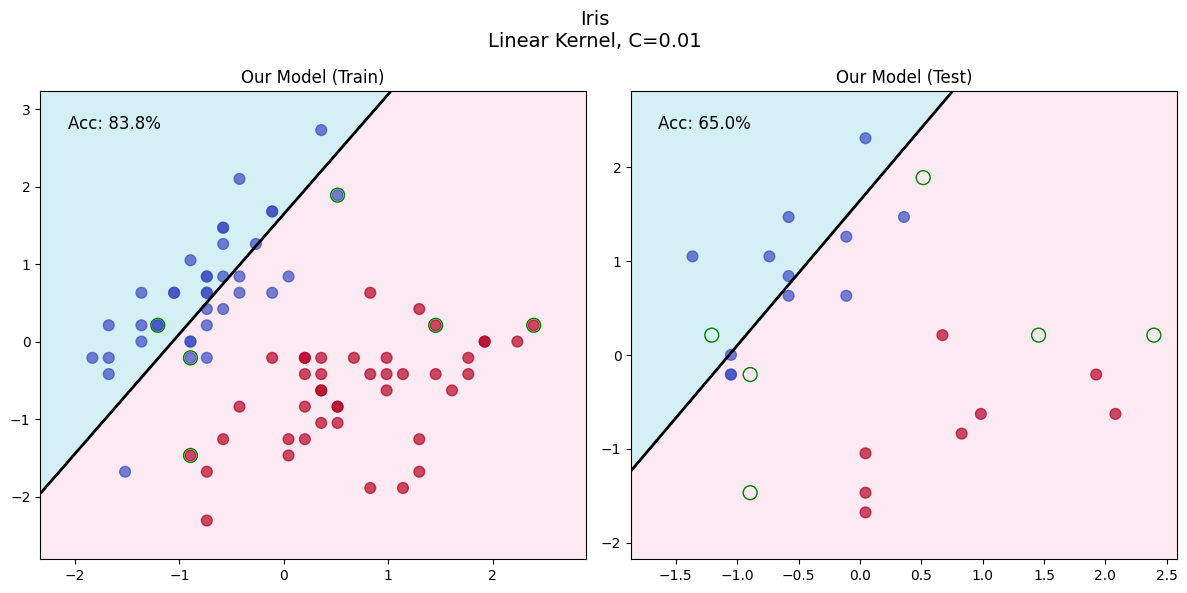

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)


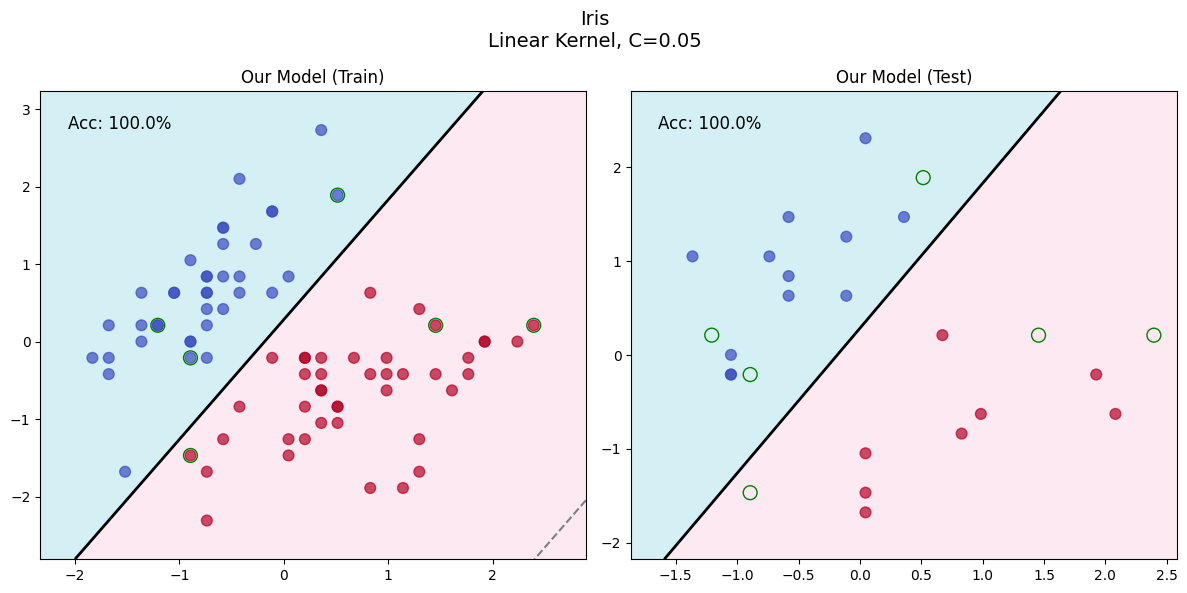

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (5,)


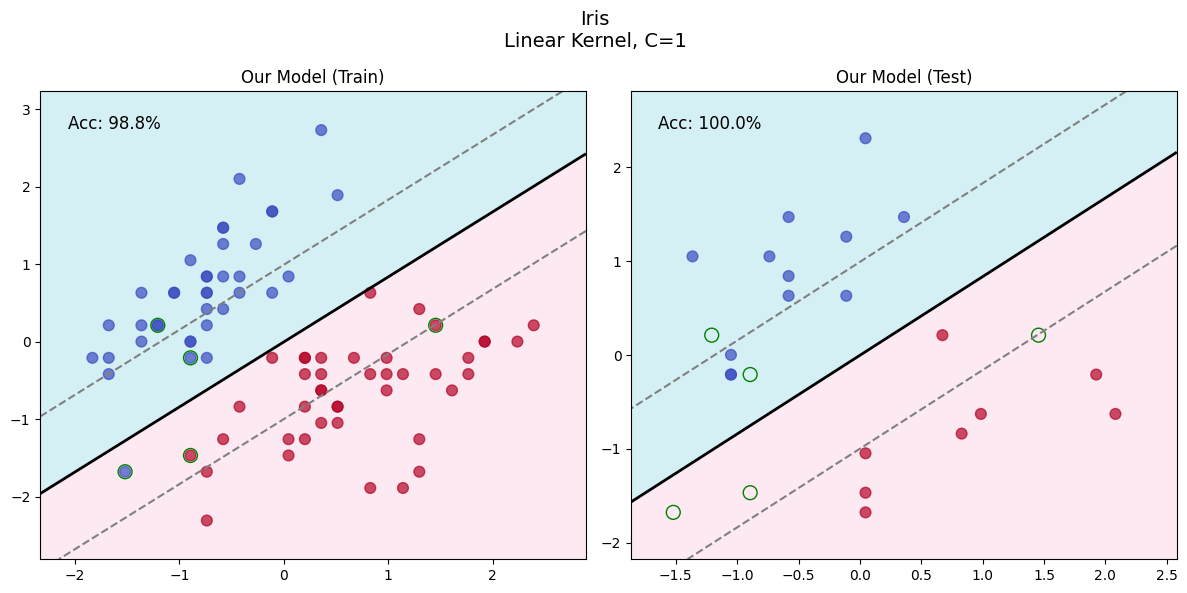

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)


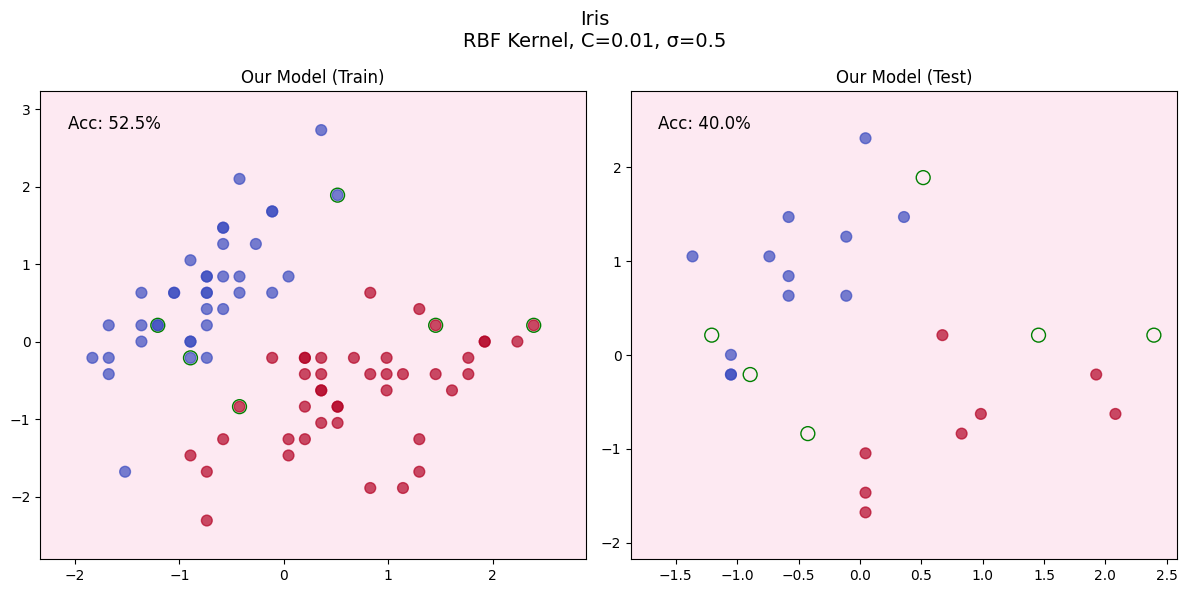

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (8,)


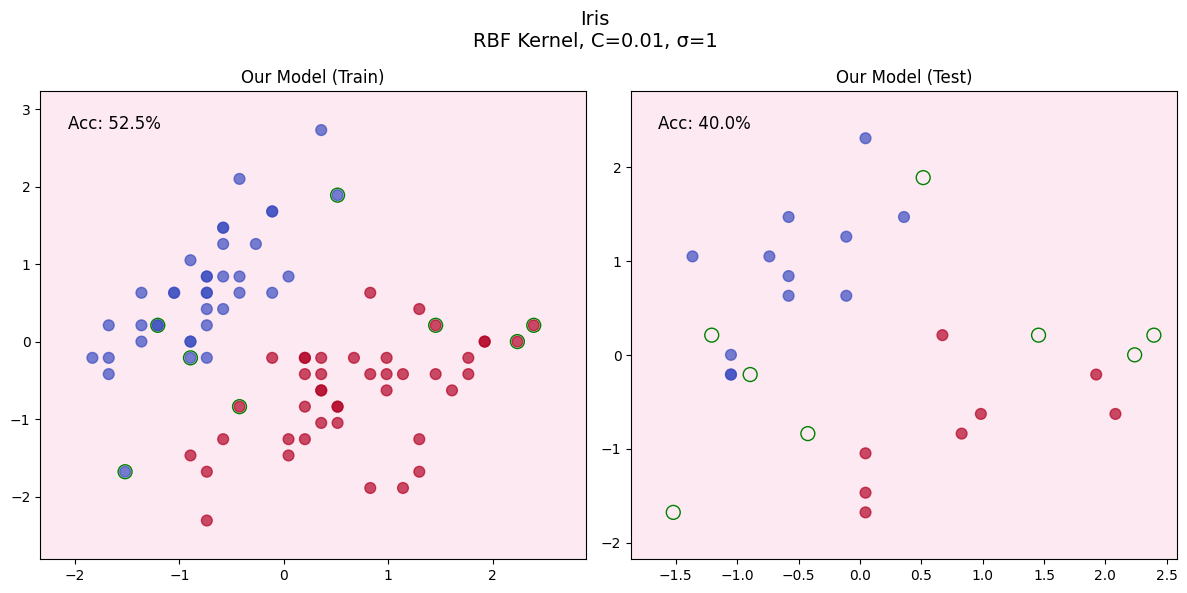

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (8,)


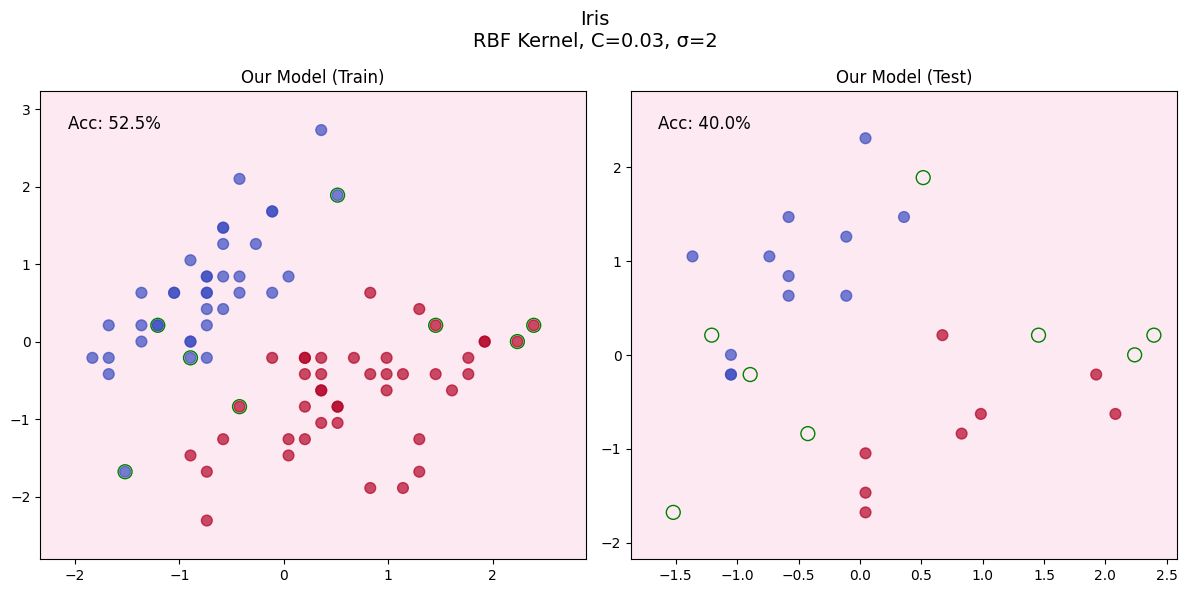

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)


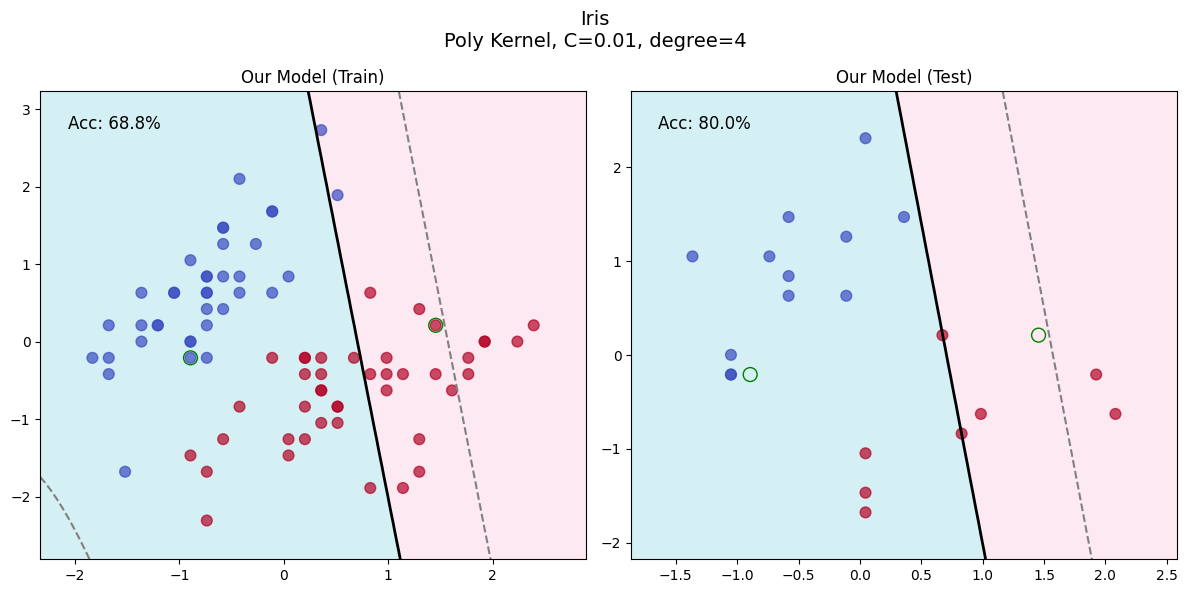

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)


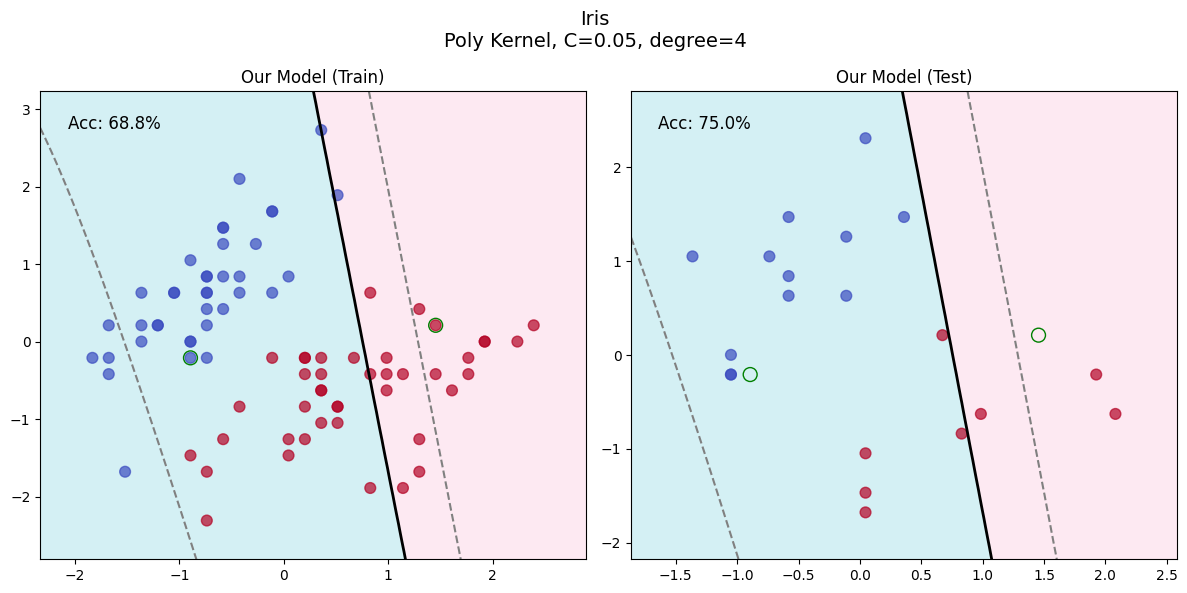

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)


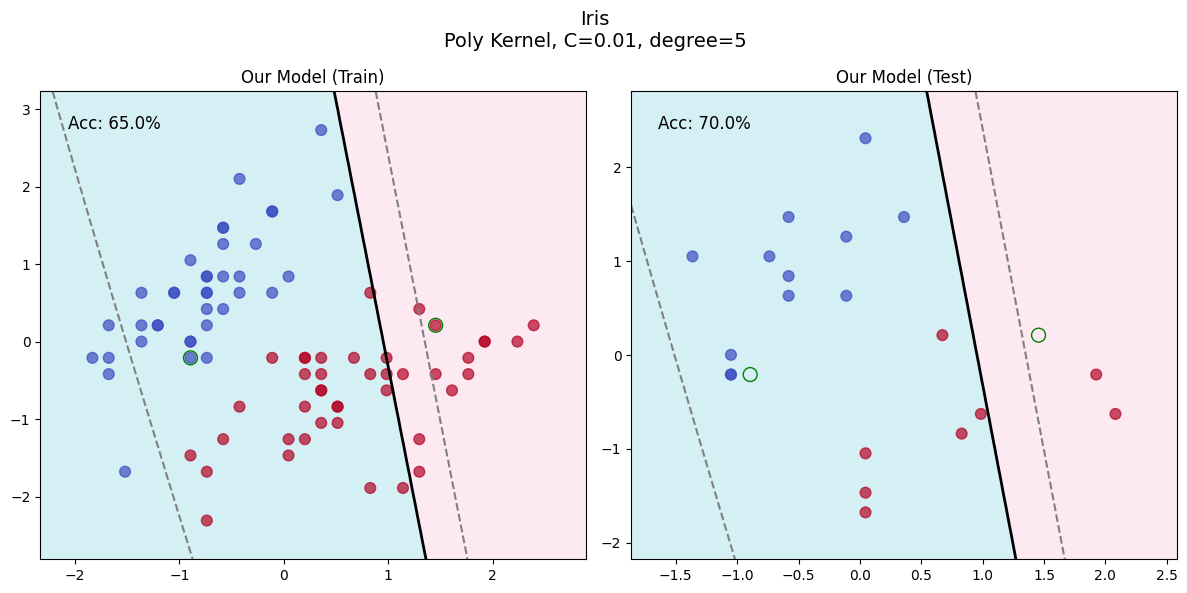

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)


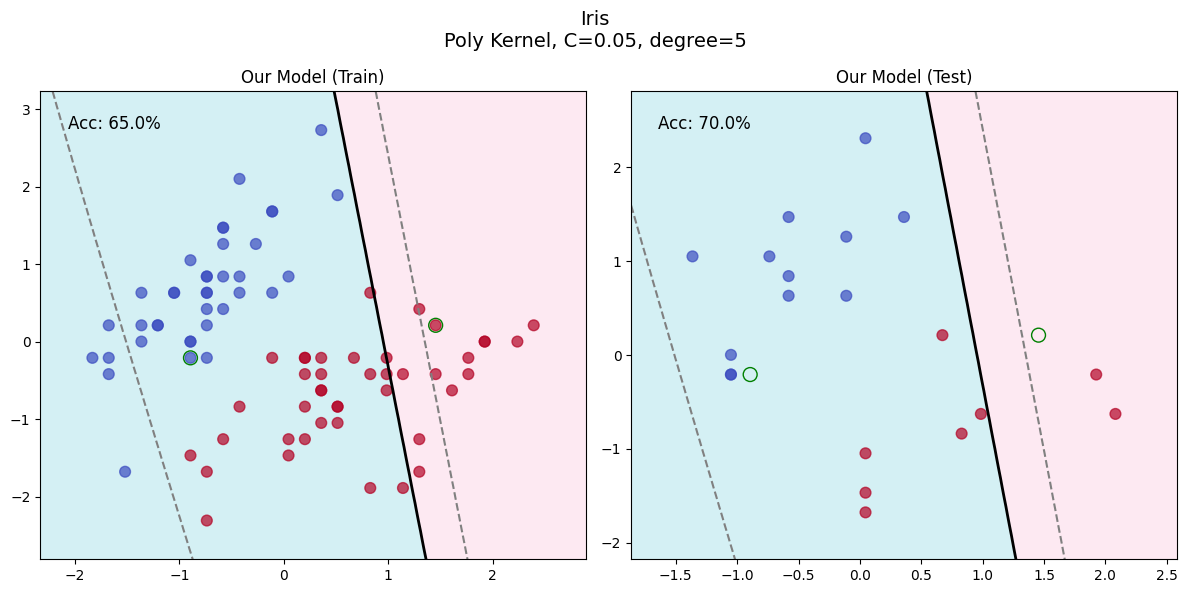

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (5,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (2,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (5,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)
in train
s

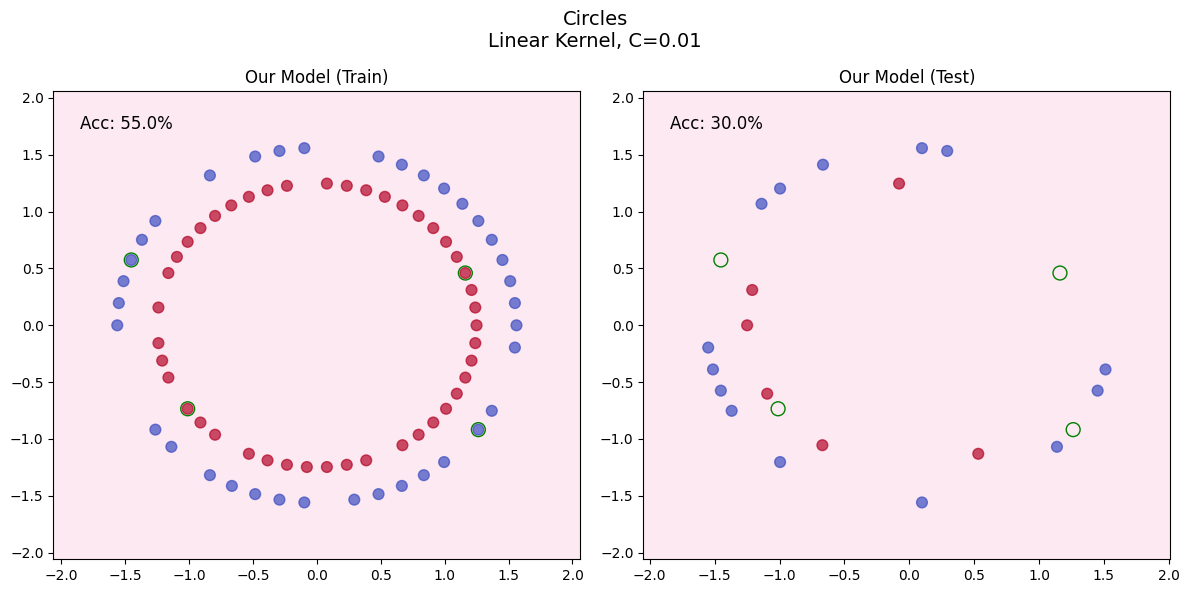

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)


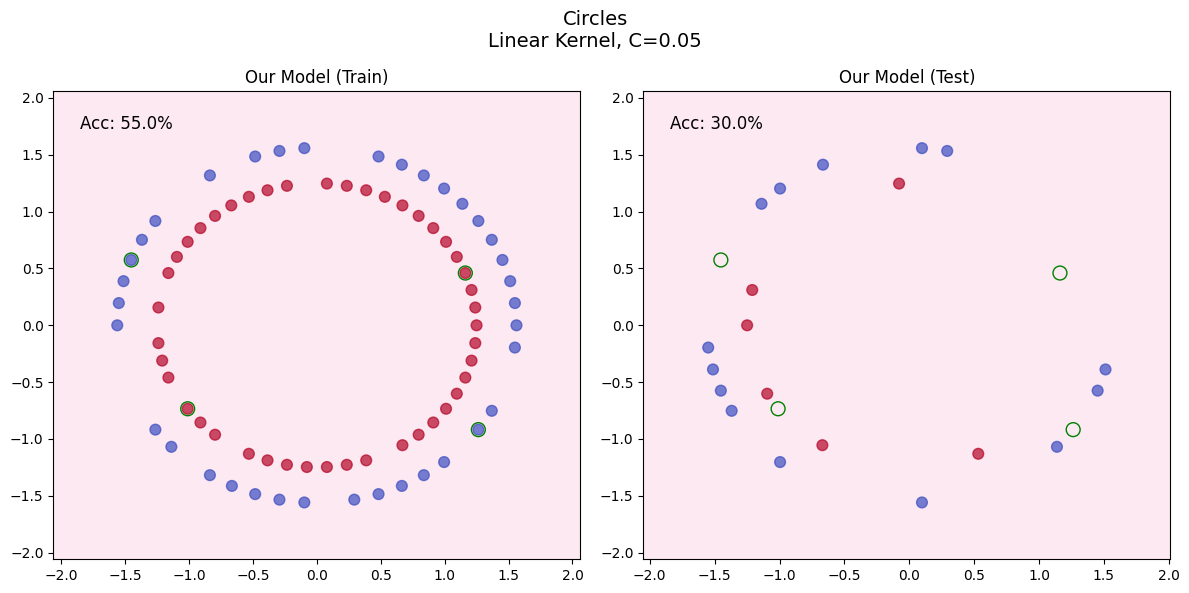

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (4,)


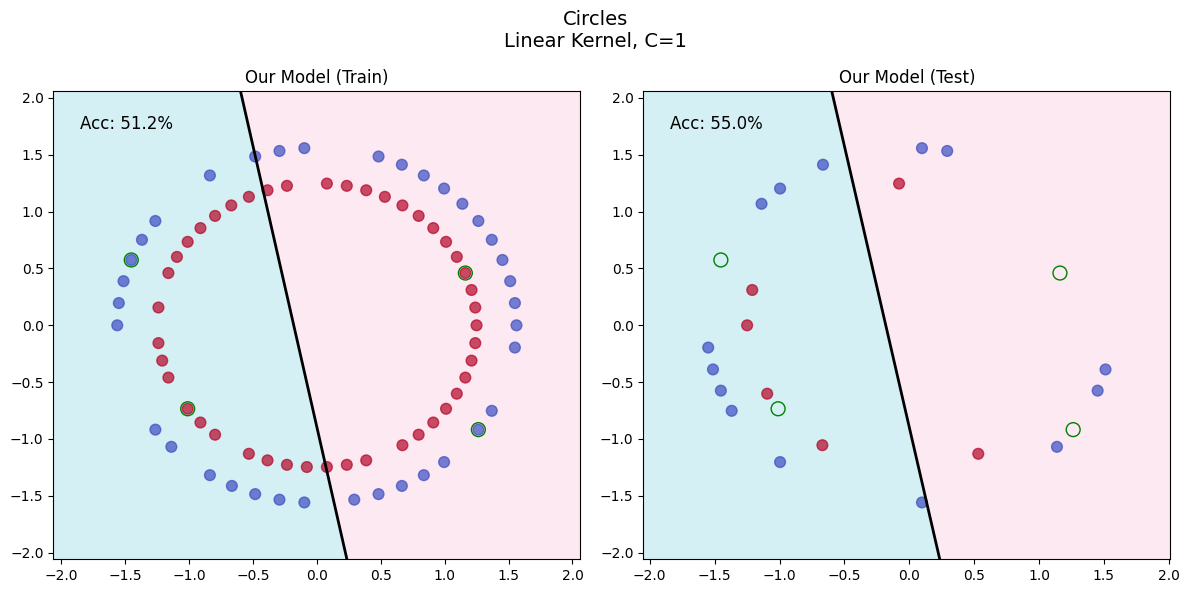

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (8,)


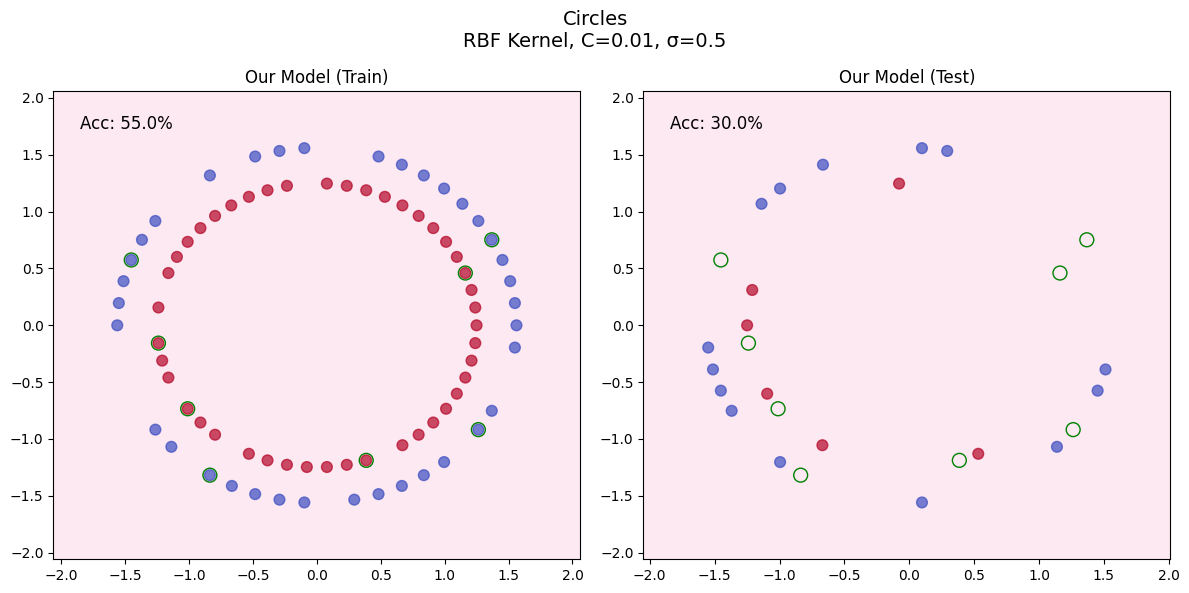

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (8,)


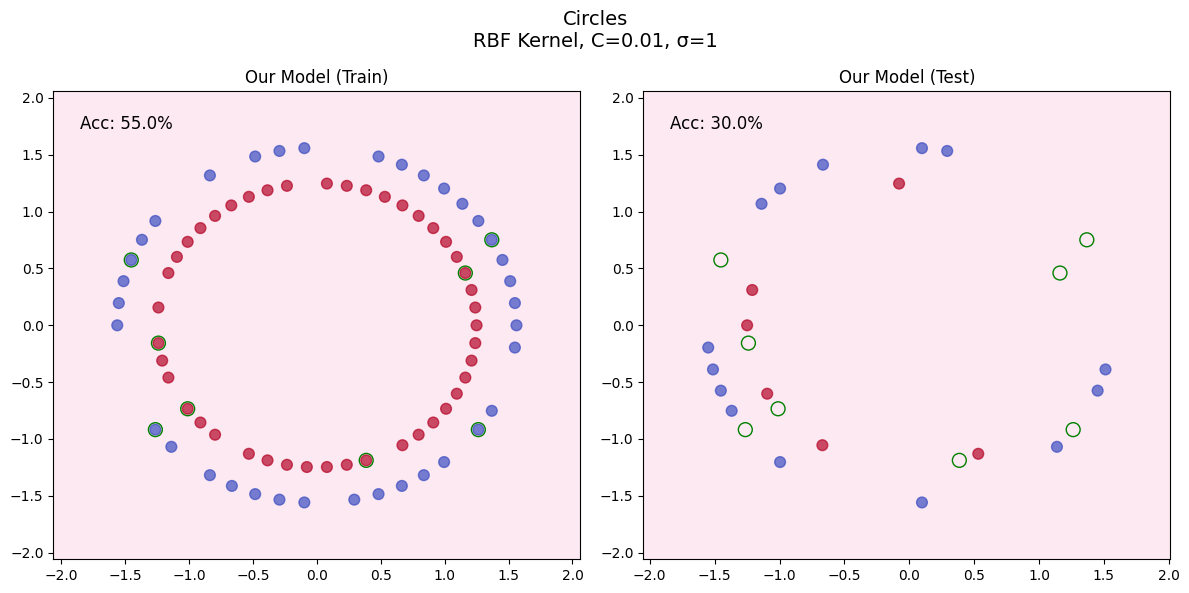

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (16,)


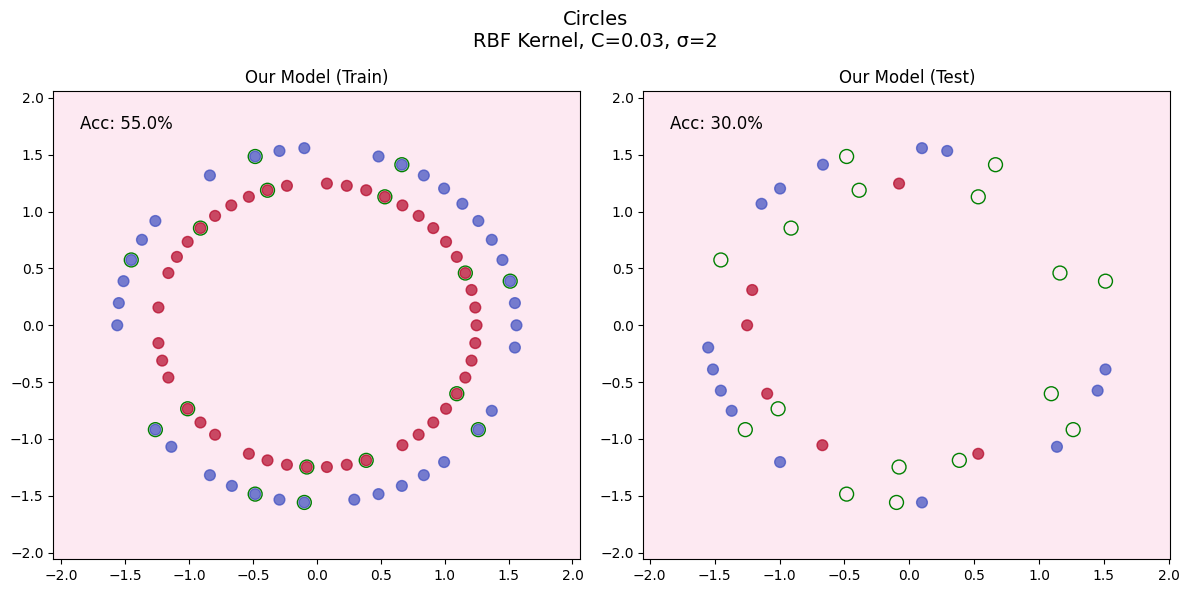

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (15,)


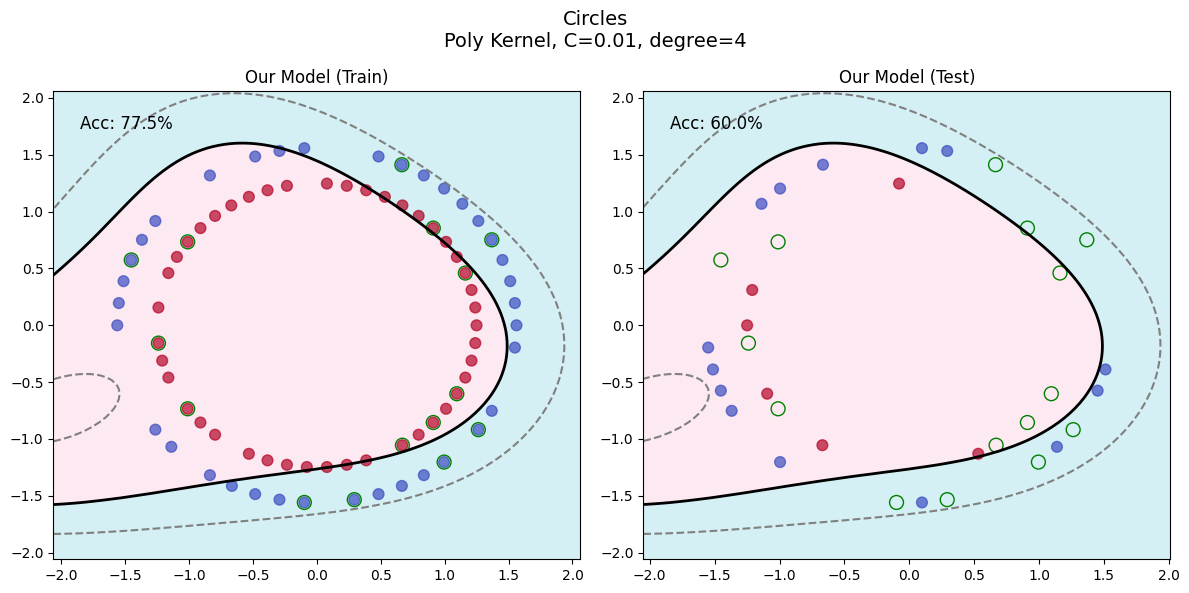

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (80,)
self.support_alpha.shape = (15,)


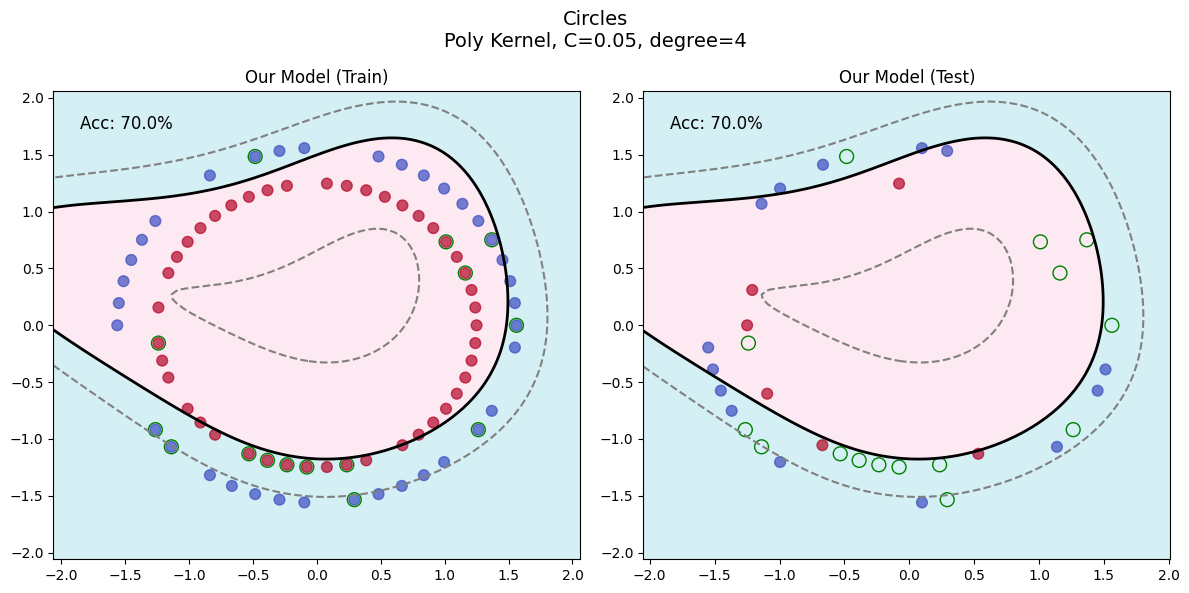

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (80,)
self.support_alpha.shape = (20,)


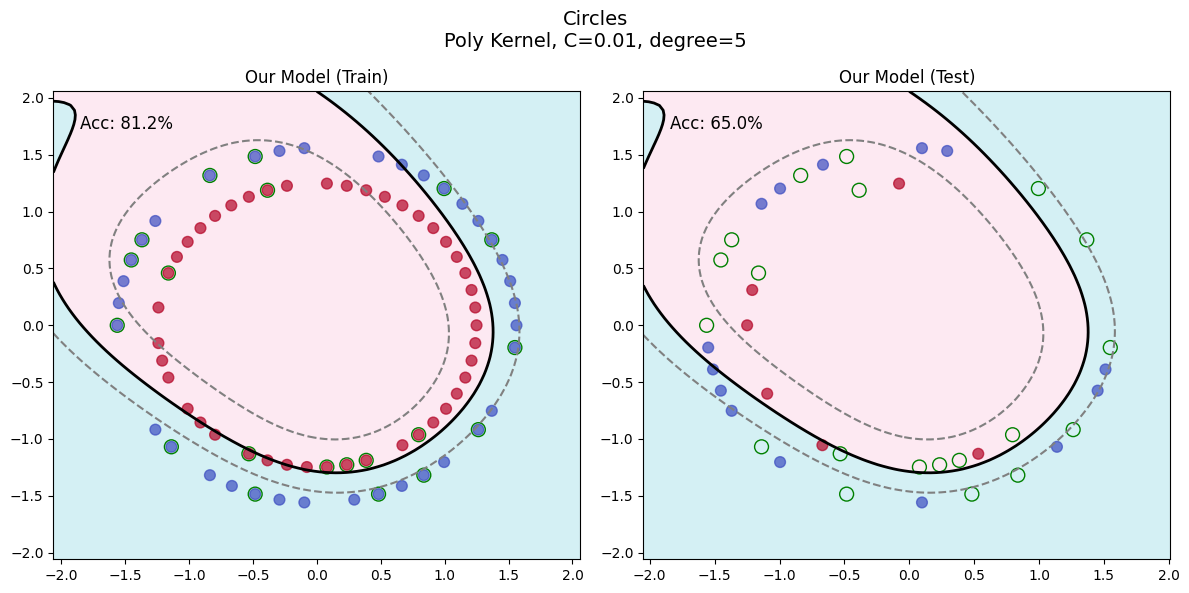

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (80,)
self.support_alpha.shape = (24,)


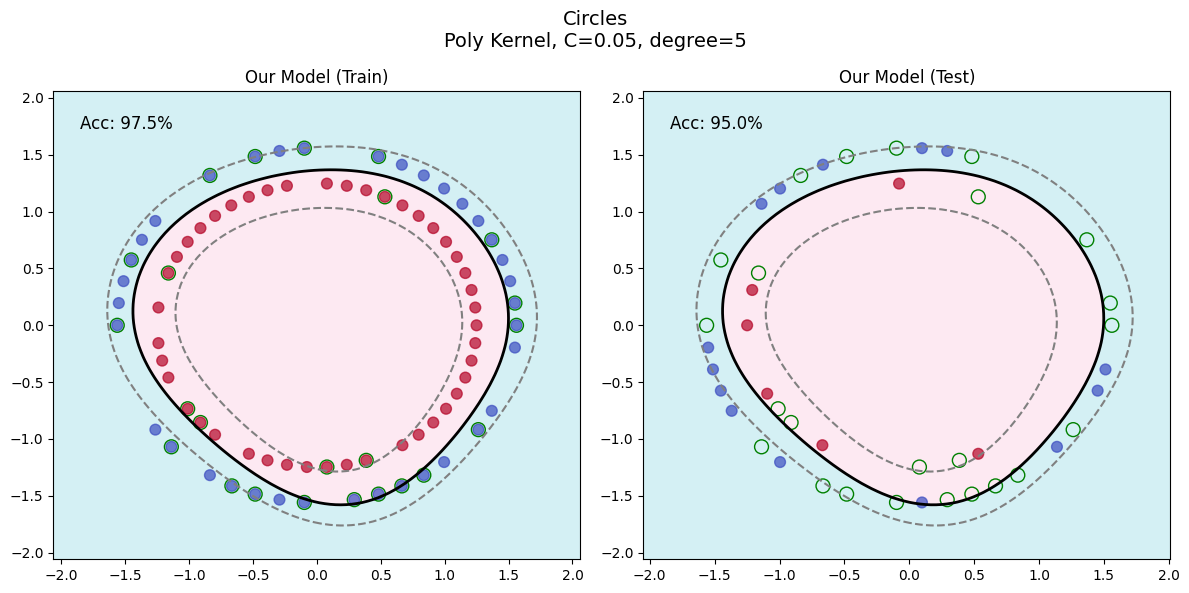

in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (6,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (5,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (14,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (14,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (14,)
in train
self.alpha.shape = (80,)
self.support_alpha.shape = (14,)
in train
self.iter = 10
self.iter = 20
self.alpha.shape = (80,)
self.support_alpha.shape = (22,)
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (80,)
self.support_alpha.shape = (19,)
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.

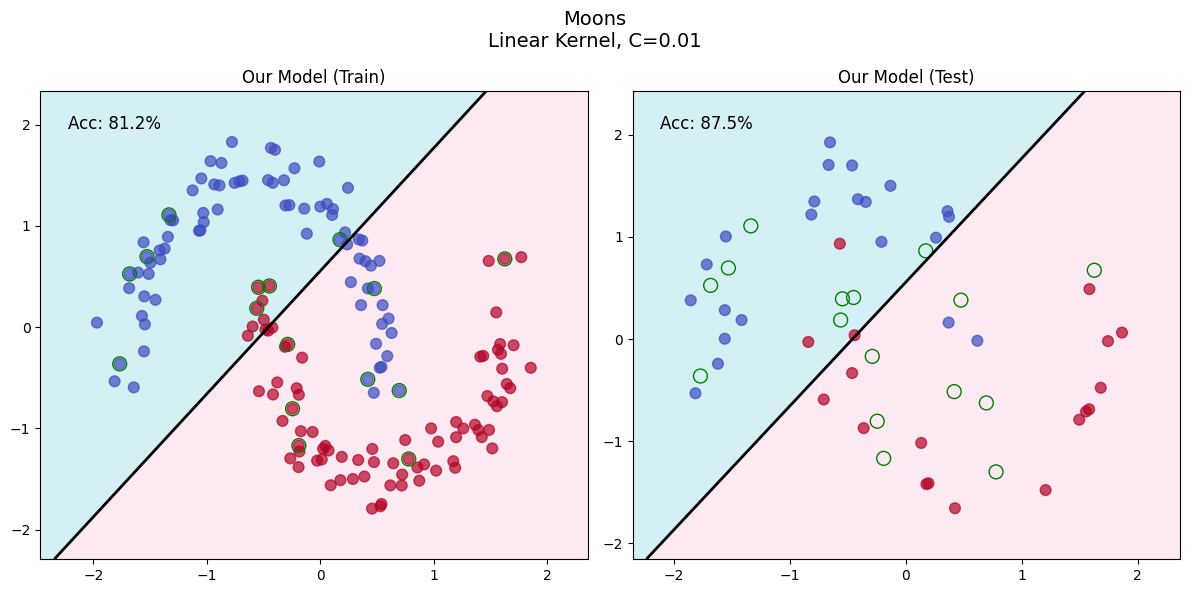

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (16,)


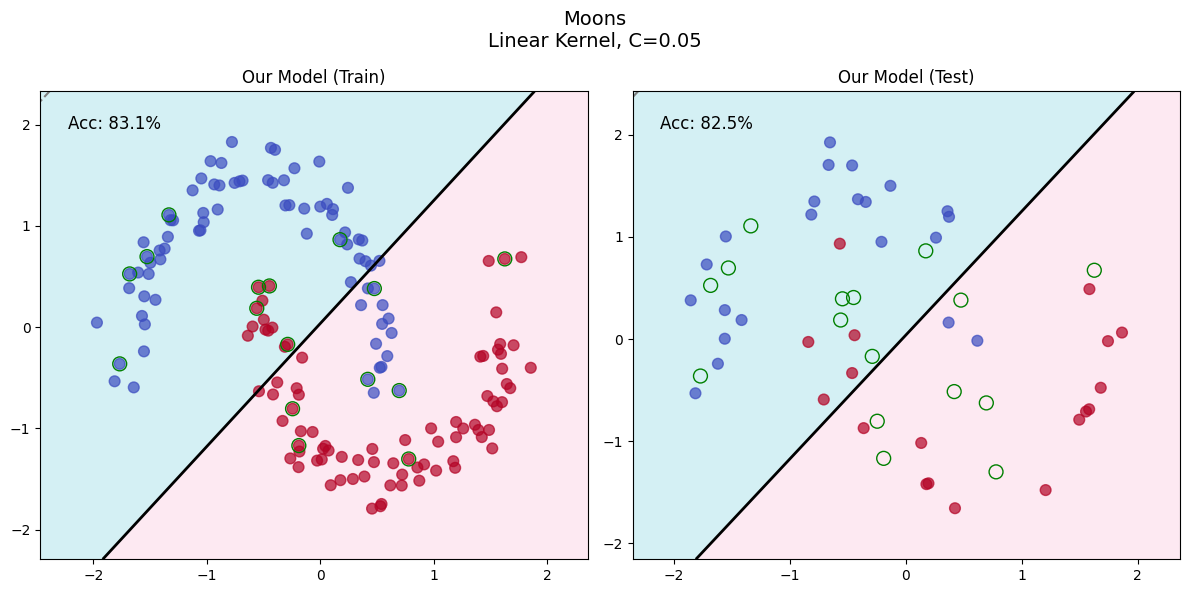

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (19,)


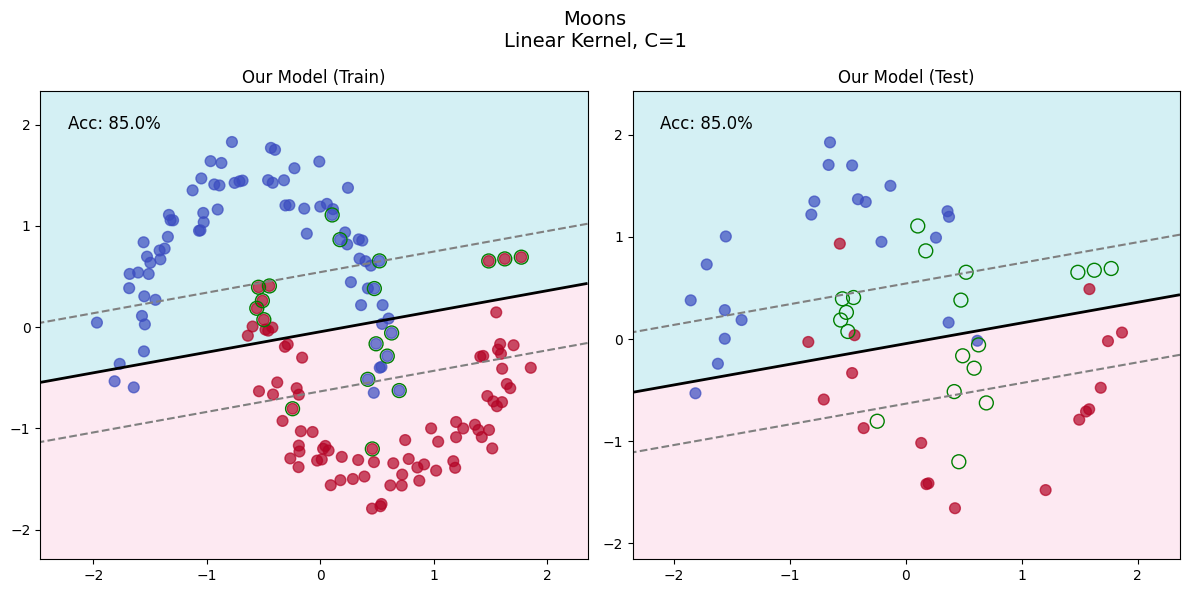

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (12,)


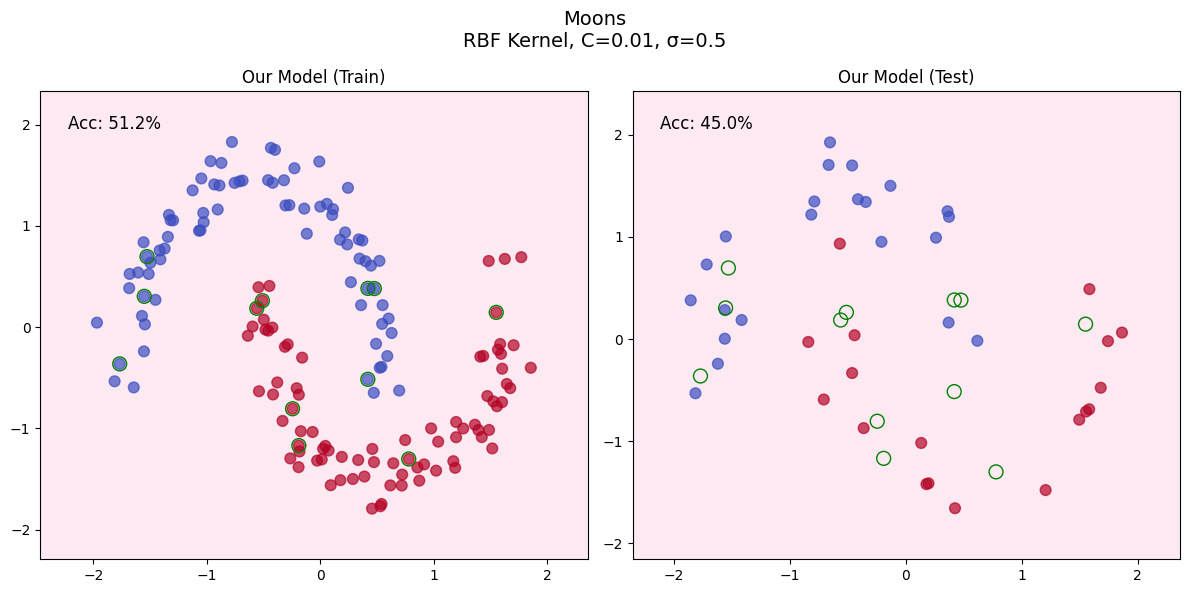

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)


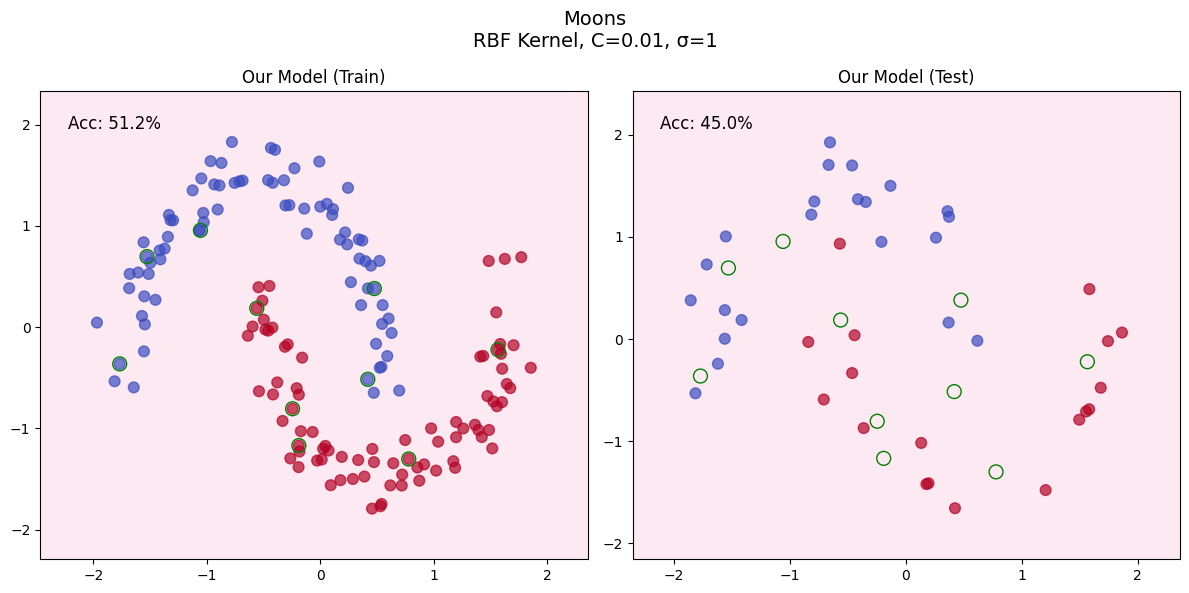

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)


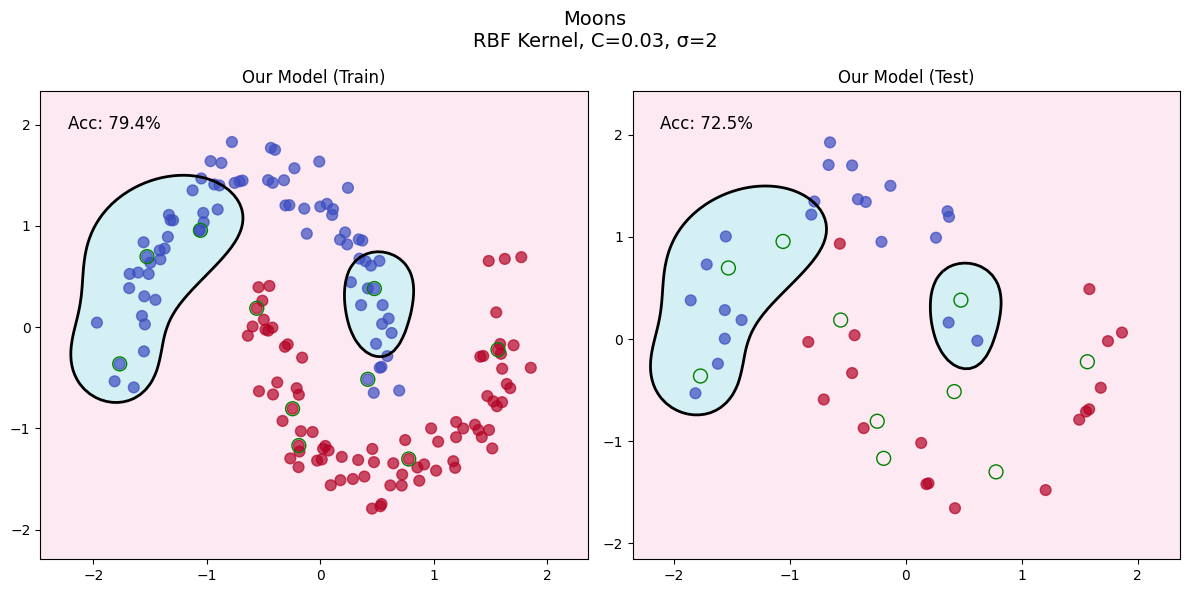

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.alpha.shape = (160,)
self.support_alpha.shape = (17,)


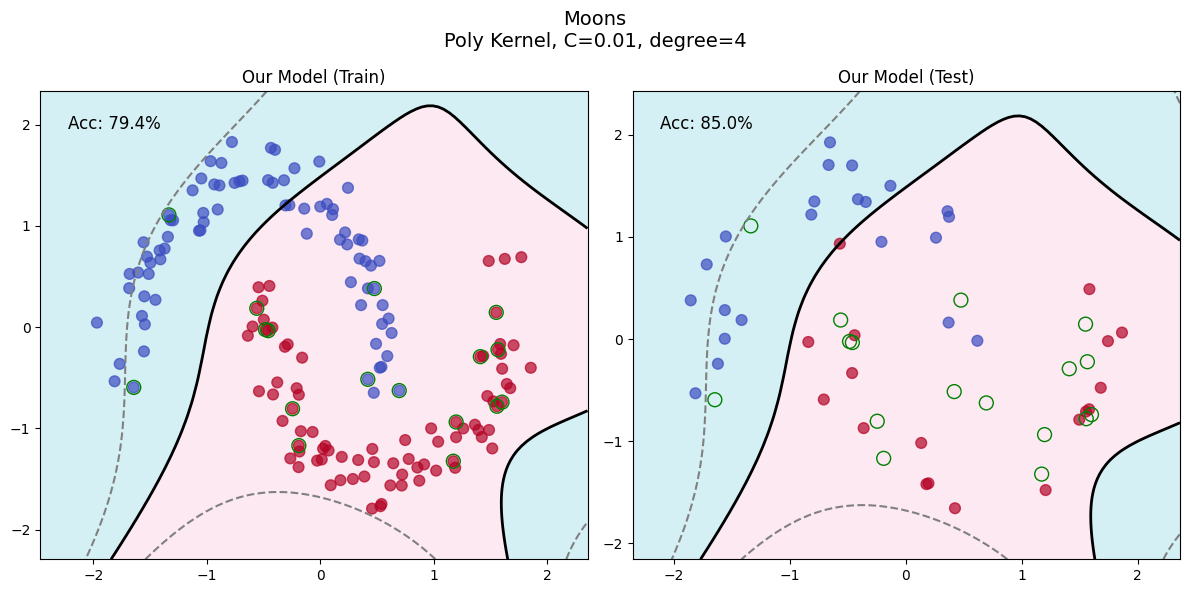

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.alpha.shape = (160,)
self.support_alpha.shape = (17,)


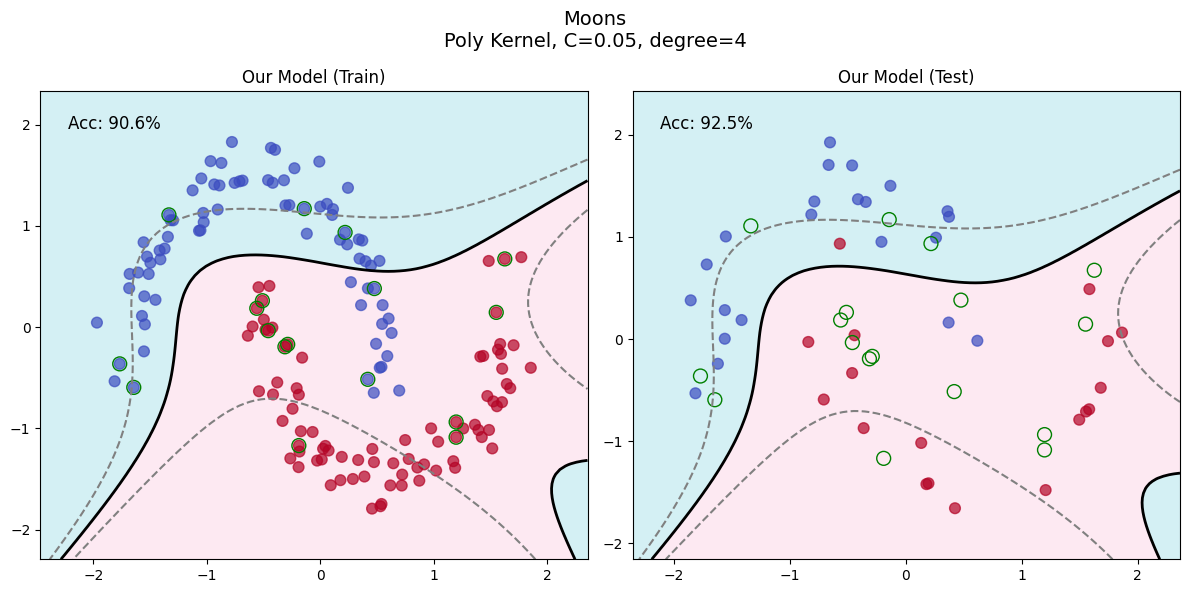

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (27,)


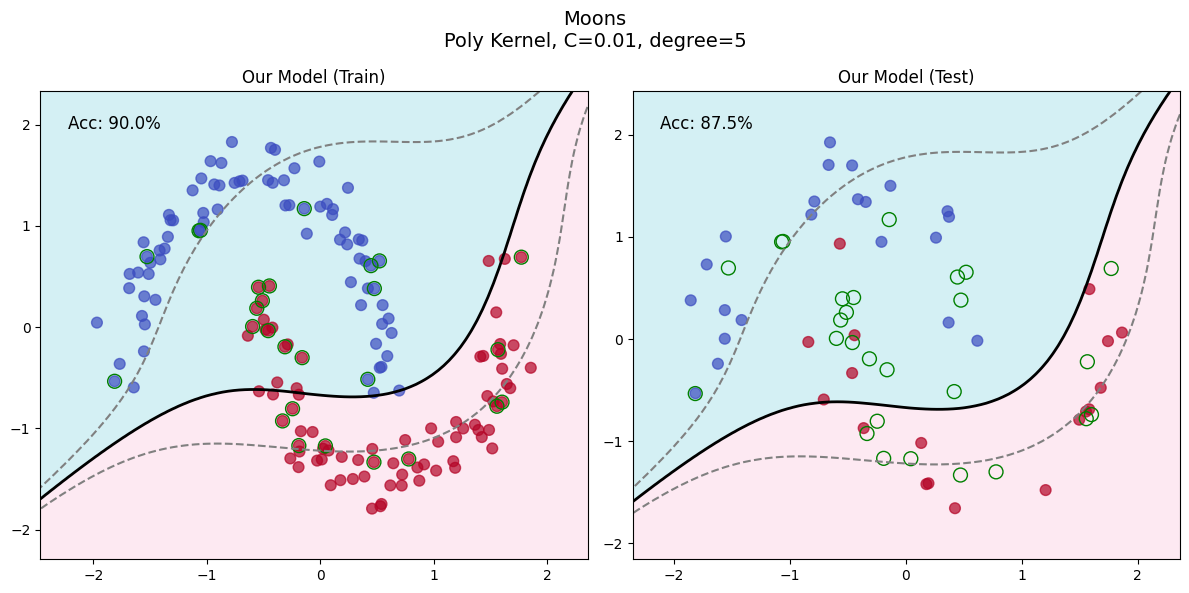

in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
self.support_alpha.shape = (16,)


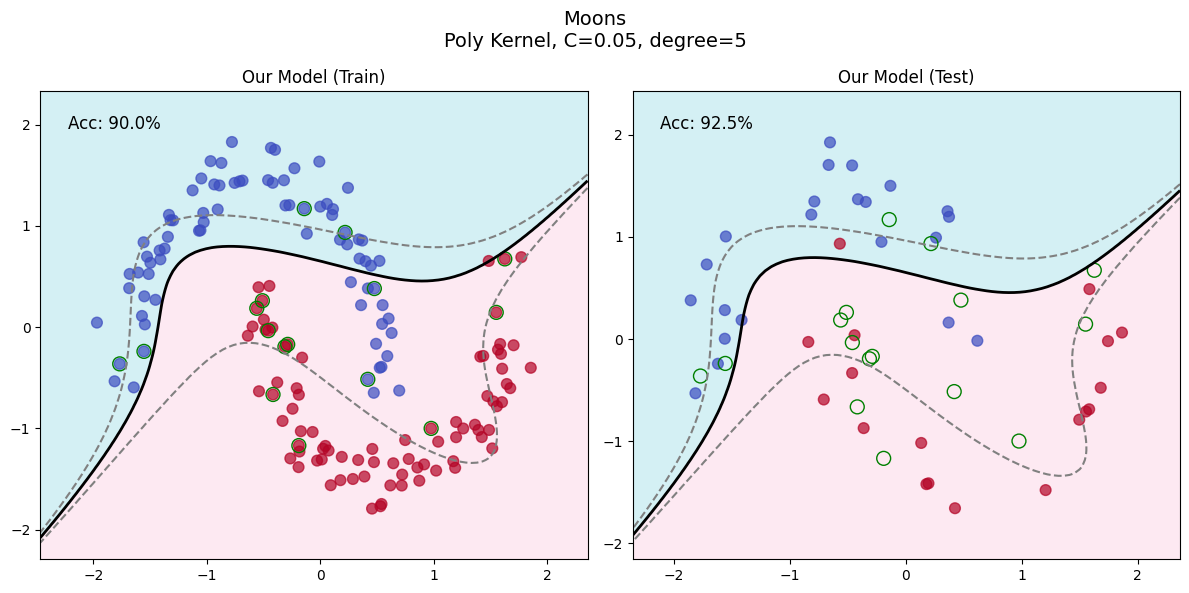

in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (12,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (10,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (12,)
in train
self.iter = 10
self.iter = 20
self.alpha.shape = (160,)
self.support_alpha.shape = (9,)
in train
self.alpha.shape = (160,)
self.support_alpha.shape = (6,)
in train
self.iter = 10
self.alpha.shape = (160,)
self.support_alpha.shape = (14,)
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import RepeatedKFold


columns = pd.MultiIndex.from_product(
    [['Accuracy', 'AUROC', 'F1', 'Support vectors'], ['SMO', 'SVC']],
    names=['metric', 'model']
)

metrics = ['Accuracy', 'AUROC', 'F1', 'Support vectors']
models = ['SMO', 'SVC']
# results = pd.DataFrame(columns=columns)
indices = []

kernel_configs = [
    ('linear', svm_linear),
    ('rbf', svm_gaussian),
    ('poly', svm_poly)
]
data = {(metric, model): [] for metric in metrics for model in models}

# results = []
for dataset in datasets:
    X, y, dataset_name = dataset
    X = StandardScaler().fit_transform(X)
    rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
    
    for i, (train_idx, test_idx) in enumerate(rkf.split(X)):
        X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
        # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
        for kernel_type, params in kernel_configs:
            for param in params:
                if kernel_type == 'linear':
                    C = param
                    some_param = 0
                    smo = KeerthiSmo(X_train, y_train, C=C)
                    sk_model = SVC(kernel='linear', C=C)
                    title = f"{dataset_name}\nLinear Kernel, C={C}"
                elif kernel_type == 'rbf':
                    C, sigma = param
                    some_param = sigma
                    smo = KeerthiSmo(X_train, y_train, C=C)
                    smo.set_kernel('gaussian', sigma)
                    sk_model = SVC(kernel='rbf', C=C, gamma=1/(2*sigma**2))
                    title = f"{dataset_name}\nRBF Kernel, C={C}, σ={sigma}"
                elif kernel_type == 'poly':
                    C, degree = param
                    some_param = degree
                    smo = KeerthiSmo(X_train, y_train, C=C)
                    smo.set_kernel('polynomial', degree)
                    sk_model = SVC(kernel='poly', C=C, degree=degree)
                    title = f"{dataset_name}\nPoly Kernel, C={C}, degree={degree}"
                
                # Обучение моделей
                smo.train()
                sk_model.fit(X_train, y_train)
                
                smo_pred = smo.predict(X_test)
                smo_scores = smo.decision_function(X_test)
                sk_pred = sk_model.predict(X_test)
                sk_scores = sk_model.decision_function(X_test)
                
                smo_accuracy = accuracy_score(y_test, smo_pred)
                smo_auroc = roc_auc_score(y_test, smo_scores)
                smo_f1 = f1_score(y_test, smo_pred)
                smo_sv = len(smo.support_vectors)
                
                sk_accuracy = accuracy_score(y_test, sk_pred)
                sk_auroc = roc_auc_score(y_test, sk_scores)
                sk_f1 = f1_score(y_test, sk_pred)
                sk_sv = len(sk_model.support_vectors_)
                
                indices.append((dataset_name, kernel_type, C, some_param, i + 1))
                data[('Accuracy', 'SMO')].append(smo_accuracy)
                data[('AUROC', 'SMO')].append(smo_auroc)
                data[('F1', 'SMO')].append(smo_f1)
                data[('Support vectors', 'SMO')].append(smo_sv)
                
                data[('Accuracy', 'SVC')].append(sk_accuracy)
                data[('AUROC', 'SVC')].append(sk_auroc)
                data[('F1', 'SVC')].append(sk_f1)
                data[('Support vectors', 'SVC')].append(sk_sv)
                if i == 0:
                    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
                    fig.suptitle(title, fontsize=14)
                    
                    plot_data_smo(smo, X_train, y_train, 'Our Model (Train)', ax1)
                    plot_data_smo(smo, X_test, y_test, 'Our Model (Test)', ax2)
                    # plot_data_sk(sk_model, X_test, y_test, 'SVC (Train)', ax3)
                    # plot_data_sk(sk_model, X_test, y_test, 'SVC (Test)', ax4)
                    plt.tight_layout()
                    plt.show()

In [32]:
row_index = pd.MultiIndex.from_tuples(indices, names=['Dataset', 'Kernel', 'C', 'Param', 'Run'])
column_index = pd.MultiIndex.from_product([metrics, models], names=['Metric', 'Model'])
results = pd.DataFrame(data, index=row_index, columns=column_index)
print(results)
results.to_csv(f'./data/all_data_{time.time_ns()}.csv')

Metric                         Accuracy               AUROC            \
Model                               SMO       SVC       SMO       SVC   
Dataset Kernel C    Param Run                                           
Spirals linear 0.01 0.0   1    0.462687  0.462687  0.411290  0.508961   
               0.05 0.0   1    0.432836  0.492537  0.411290  0.516129   
               1.00 0.0   1    0.388060  0.507463  0.407706  0.508961   
        rbf    0.01 0.5   1    0.462687  0.462687  0.407706  0.727599   
                    1.0   1    0.462687  0.462687  0.492832  0.447133   
...                                 ...       ...       ...       ...   
Moons   rbf    0.03 2.0   9    0.878788  0.848485  1.000000  0.949449   
        poly   0.01 4.0   9    0.833333  0.484848  0.951287  0.504596   
               0.05 4.0   9    0.969697  0.484848  0.997243  0.503676   
               0.01 5.0   9    0.909091  0.833333  0.977022  0.952206   
               0.05 5.0   9    0.924242  0.863636  

In [34]:
grouped = results.groupby(level=['Dataset', 'Kernel', 'C', 'Param'])
aggregated = grouped.agg(['mean', 'std'])
print(aggregated)
aggregated.to_csv(f'./data/aggregated_data_{time.time_ns()}.csv')

Metric                     Accuracy                                   AUROC  \
Model                           SMO                 SVC                 SMO   
                               mean       std      mean       std      mean   
Dataset Kernel C    Param                                                     
Circles linear 0.01 0.0    0.399881  0.058565  0.423450  0.055351  0.456627   
               0.05 0.0    0.429887  0.073542  0.409982  0.053251  0.482770   
               1.00 0.0    0.482967  0.084255  0.383442  0.054431  0.519490   
        poly   0.01 4.0    0.659438  0.156371  0.423450  0.055351  0.690754   
                    5.0    0.863735  0.102342  0.423450  0.055351  0.904094   
               0.05 4.0    0.883046  0.158391  0.423450  0.055351  0.907107   
                    5.0    0.804219  0.123035  0.406615  0.057348  0.896866   
        rbf    0.01 0.5    0.423450  0.055351  0.423450  0.055351  0.586464   
                    1.0    0.423450  0.055351  0.423

In [ ]:
df = results.copy(deep=True)
df.columns = ['_'.join(col).strip() for col in df.columns.values]

df_reset = df.reset_index()

df_long = df_reset.melt(
    id_vars=['Dataset', 'Kernel', 'C', 'Param', 'Run'],  
    var_name='Metric_Model',
    value_name='Value'      
)

df_long[['Metric', 'Model']] = df_long['Metric_Model'].str.split('_', expand=True)
df_long = df_long.drop(columns=['Metric_Model'])

print(df_long)

      Dataset  Kernel     C  Param  Run       Value           Metric Model
0     Spirals  linear  0.01    0.0    1    0.462687         Accuracy   SMO
1     Spirals  linear  0.05    0.0    1    0.432836         Accuracy   SMO
2     Spirals  linear  1.00    0.0    1    0.388060         Accuracy   SMO
3     Spirals     rbf  0.01    0.5    1    0.462687         Accuracy   SMO
4     Spirals     rbf  0.01    1.0    1    0.462687         Accuracy   SMO
...       ...     ...   ...    ...  ...         ...              ...   ...
2875    Moons     rbf  0.03    2.0    9  132.000000  Support vectors   SVC
2876    Moons    poly  0.01    4.0    9  133.000000  Support vectors   SVC
2877    Moons    poly  0.05    4.0    9  133.000000  Support vectors   SVC
2878    Moons    poly  0.01    5.0    9  102.000000  Support vectors   SVC
2879    Moons    poly  0.05    5.0    9   73.000000  Support vectors   SVC

[2880 rows x 8 columns]


     Dataset  Kernel     C  Param  Run     Value    Metric Model
0    Spirals  linear  0.01    0.0    1  0.462687  Accuracy   SMO
1    Spirals  linear  0.05    0.0    1  0.432836  Accuracy   SMO
2    Spirals  linear  1.00    0.0    1  0.388060  Accuracy   SMO
3    Spirals     rbf  0.01    0.5    1  0.462687  Accuracy   SMO
4    Spirals     rbf  0.01    1.0    1  0.462687  Accuracy   SMO
..       ...     ...   ...    ...  ...       ...       ...   ...
445  Spirals     rbf  0.03    2.0    9  0.469697  Accuracy   SVC
446  Spirals    poly  0.01    4.0    9  0.393939  Accuracy   SVC
447  Spirals    poly  0.05    4.0    9  0.363636  Accuracy   SVC
448  Spirals    poly  0.01    5.0    9  0.560606  Accuracy   SVC
449  Spirals    poly  0.05    5.0    9  0.560606  Accuracy   SVC

[180 rows x 8 columns]


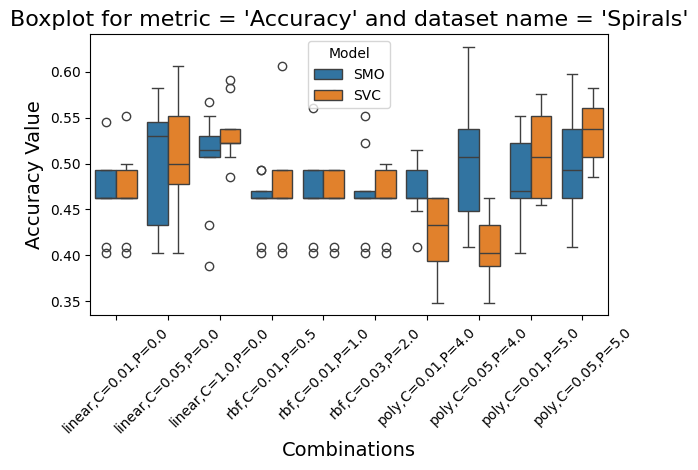

    Dataset  Kernel     C  Param  Run     Value    Metric Model
90     Iris  linear  0.01    0.0    1  0.441176  Accuracy   SMO
91     Iris  linear  0.05    0.0    1  1.000000  Accuracy   SMO
92     Iris  linear  1.00    0.0    1  1.000000  Accuracy   SMO
93     Iris     rbf  0.01    0.5    1  0.411765  Accuracy   SMO
94     Iris     rbf  0.01    1.0    1  0.411765  Accuracy   SMO
..      ...     ...   ...    ...  ...       ...       ...   ...
535    Iris     rbf  0.03    2.0    9  0.393939  Accuracy   SVC
536    Iris    poly  0.01    4.0    9  0.393939  Accuracy   SVC
537    Iris    poly  0.05    4.0    9  0.454545  Accuracy   SVC
538    Iris    poly  0.01    5.0    9  0.575758  Accuracy   SVC
539    Iris    poly  0.05    5.0    9  0.575758  Accuracy   SVC

[180 rows x 8 columns]


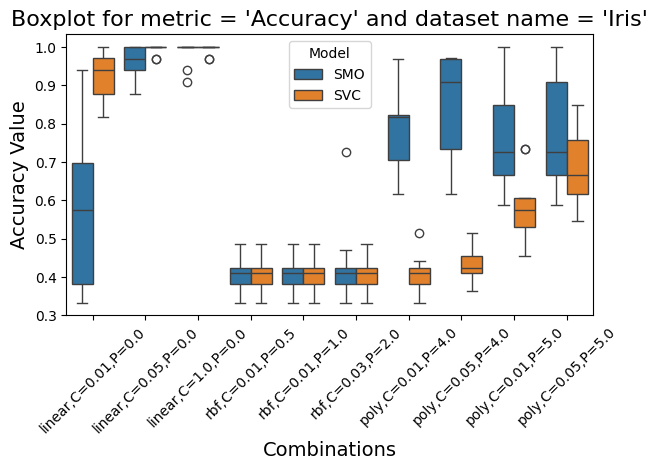

     Dataset  Kernel     C  Param  Run     Value    Metric Model
180  Circles  linear  0.01    0.0    1  0.323529  Accuracy   SMO
181  Circles  linear  0.05    0.0    1  0.323529  Accuracy   SMO
182  Circles  linear  1.00    0.0    1  0.441176  Accuracy   SMO
183  Circles     rbf  0.01    0.5    1  0.323529  Accuracy   SMO
184  Circles     rbf  0.01    1.0    1  0.323529  Accuracy   SMO
..       ...     ...   ...    ...  ...       ...       ...   ...
625  Circles     rbf  0.03    2.0    9  0.363636  Accuracy   SVC
626  Circles    poly  0.01    4.0    9  0.363636  Accuracy   SVC
627  Circles    poly  0.05    4.0    9  0.363636  Accuracy   SVC
628  Circles    poly  0.01    5.0    9  0.363636  Accuracy   SVC
629  Circles    poly  0.05    5.0    9  0.363636  Accuracy   SVC

[180 rows x 8 columns]


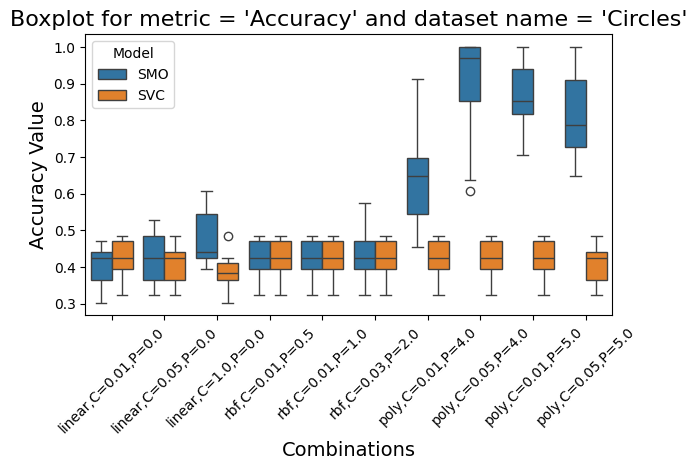

    Dataset  Kernel     C  Param  Run     Value    Metric Model
270   Moons  linear  0.01    0.0    1  0.910448  Accuracy   SMO
271   Moons  linear  0.05    0.0    1  0.850746  Accuracy   SMO
272   Moons  linear  1.00    0.0    1  0.820896  Accuracy   SMO
273   Moons     rbf  0.01    0.5    1  0.447761  Accuracy   SMO
274   Moons     rbf  0.01    1.0    1  0.447761  Accuracy   SMO
..      ...     ...   ...    ...  ...       ...       ...   ...
715   Moons     rbf  0.03    2.0    9  0.848485  Accuracy   SVC
716   Moons    poly  0.01    4.0    9  0.484848  Accuracy   SVC
717   Moons    poly  0.05    4.0    9  0.484848  Accuracy   SVC
718   Moons    poly  0.01    5.0    9  0.833333  Accuracy   SVC
719   Moons    poly  0.05    5.0    9  0.863636  Accuracy   SVC

[180 rows x 8 columns]


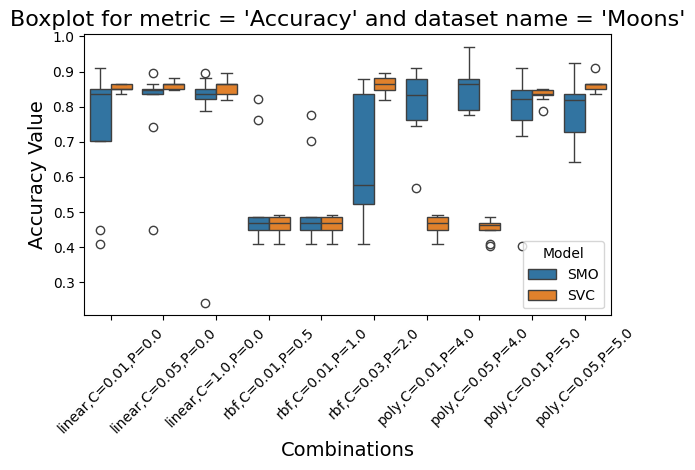

      Dataset  Kernel     C  Param  Run     Value Metric Model
720   Spirals  linear  0.01    0.0    1  0.411290  AUROC   SMO
721   Spirals  linear  0.05    0.0    1  0.411290  AUROC   SMO
722   Spirals  linear  1.00    0.0    1  0.407706  AUROC   SMO
723   Spirals     rbf  0.01    0.5    1  0.407706  AUROC   SMO
724   Spirals     rbf  0.01    1.0    1  0.492832  AUROC   SMO
...       ...     ...   ...    ...  ...       ...    ...   ...
1165  Spirals     rbf  0.03    2.0    9  0.564977  AUROC   SVC
1166  Spirals    poly  0.01    4.0    9  0.429493  AUROC   SVC
1167  Spirals    poly  0.05    4.0    9  0.409217  AUROC   SVC
1168  Spirals    poly  0.01    5.0    9  0.623963  AUROC   SVC
1169  Spirals    poly  0.05    5.0    9  0.632258  AUROC   SVC

[180 rows x 8 columns]


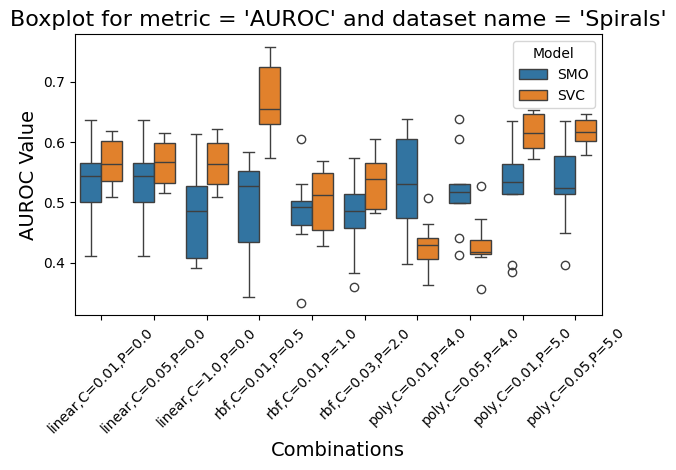

     Dataset  Kernel     C  Param  Run     Value Metric Model
810     Iris  linear  0.01    0.0    1  1.000000  AUROC   SMO
811     Iris  linear  0.05    0.0    1  1.000000  AUROC   SMO
812     Iris  linear  1.00    0.0    1  1.000000  AUROC   SMO
813     Iris     rbf  0.01    0.5    1  1.000000  AUROC   SMO
814     Iris     rbf  0.01    1.0    1  1.000000  AUROC   SMO
...      ...     ...   ...    ...  ...       ...    ...   ...
1255    Iris     rbf  0.03    2.0    9  1.000000  AUROC   SVC
1256    Iris    poly  0.01    4.0    9  0.523077  AUROC   SVC
1257    Iris    poly  0.05    4.0    9  0.503846  AUROC   SVC
1258    Iris    poly  0.01    5.0    9  1.000000  AUROC   SVC
1259    Iris    poly  0.05    5.0    9  1.000000  AUROC   SVC

[180 rows x 8 columns]


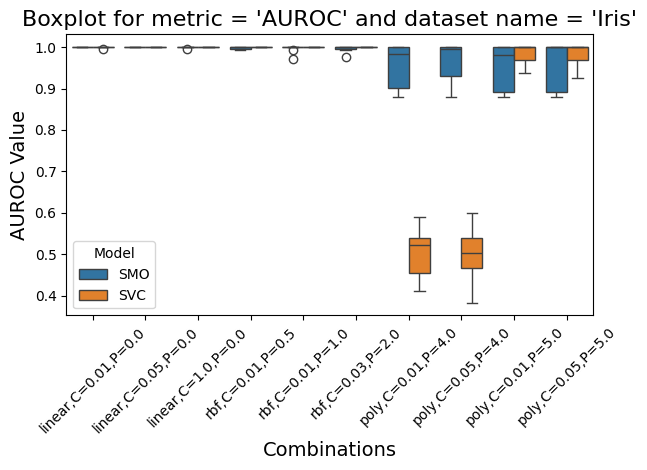

      Dataset  Kernel     C  Param  Run     Value Metric Model
900   Circles  linear  0.01    0.0    1  0.482213  AUROC   SMO
901   Circles  linear  0.05    0.0    1  0.482213  AUROC   SMO
902   Circles  linear  1.00    0.0    1  0.482213  AUROC   SMO
903   Circles     rbf  0.01    0.5    1  0.683794  AUROC   SMO
904   Circles     rbf  0.01    1.0    1  0.699605  AUROC   SMO
...       ...     ...   ...    ...  ...       ...    ...   ...
1345  Circles     rbf  0.03    2.0    9  1.000000  AUROC   SVC
1346  Circles    poly  0.01    4.0    9  1.000000  AUROC   SVC
1347  Circles    poly  0.05    4.0    9  1.000000  AUROC   SVC
1348  Circles    poly  0.01    5.0    9  0.464286  AUROC   SVC
1349  Circles    poly  0.05    5.0    9  0.452381  AUROC   SVC

[180 rows x 8 columns]


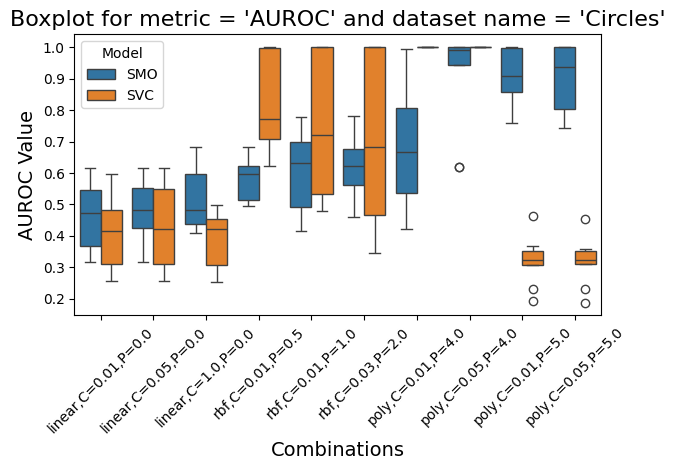

     Dataset  Kernel     C  Param  Run     Value Metric Model
990    Moons  linear  0.01    0.0    1  0.959459  AUROC   SMO
991    Moons  linear  0.05    0.0    1  0.959459  AUROC   SMO
992    Moons  linear  1.00    0.0    1  0.944144  AUROC   SMO
993    Moons     rbf  0.01    0.5    1  0.949550  AUROC   SMO
994    Moons     rbf  0.01    1.0    1  0.969369  AUROC   SMO
...      ...     ...   ...    ...  ...       ...    ...   ...
1435   Moons     rbf  0.03    2.0    9  0.949449  AUROC   SVC
1436   Moons    poly  0.01    4.0    9  0.504596  AUROC   SVC
1437   Moons    poly  0.05    4.0    9  0.503676  AUROC   SVC
1438   Moons    poly  0.01    5.0    9  0.952206  AUROC   SVC
1439   Moons    poly  0.05    5.0    9  0.959559  AUROC   SVC

[180 rows x 8 columns]


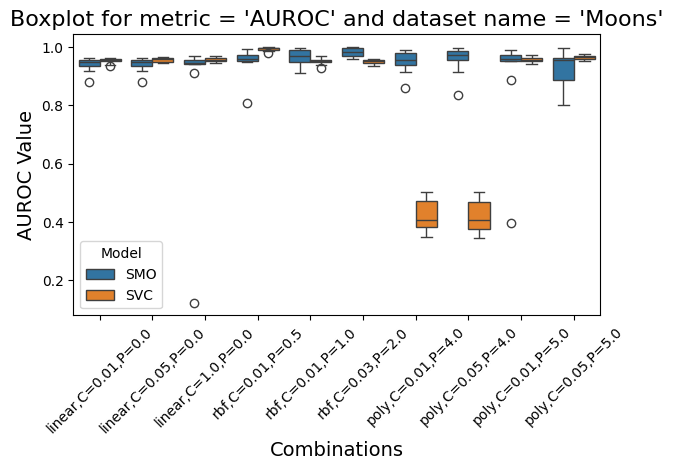

      Dataset  Kernel     C  Param  Run     Value Metric Model
1440  Spirals  linear  0.01    0.0    1  0.632653     F1   SMO
1441  Spirals  linear  0.05    0.0    1  0.558140     F1   SMO
1442  Spirals  linear  1.00    0.0    1  0.388060     F1   SMO
1443  Spirals     rbf  0.01    0.5    1  0.632653     F1   SMO
1444  Spirals     rbf  0.01    1.0    1  0.632653     F1   SMO
...       ...     ...   ...    ...  ...       ...    ...   ...
1885  Spirals     rbf  0.03    2.0    9  0.000000     F1   SVC
1886  Spirals    poly  0.01    4.0    9  0.090909     F1   SVC
1887  Spirals    poly  0.05    4.0    9  0.086957     F1   SVC
1888  Spirals    poly  0.01    5.0    9  0.292683     F1   SVC
1889  Spirals    poly  0.05    5.0    9  0.292683     F1   SVC

[180 rows x 8 columns]


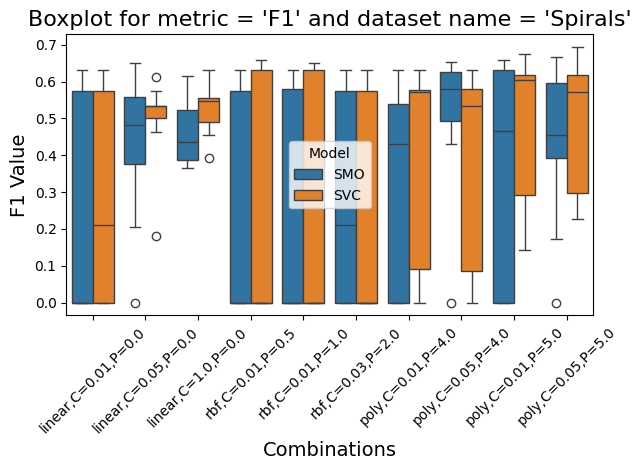

     Dataset  Kernel     C  Param  Run     Value Metric Model
1530    Iris  linear  0.01    0.0    1  0.595745     F1   SMO
1531    Iris  linear  0.05    0.0    1  1.000000     F1   SMO
1532    Iris  linear  1.00    0.0    1  1.000000     F1   SMO
1533    Iris     rbf  0.01    0.5    1  0.583333     F1   SMO
1534    Iris     rbf  0.01    1.0    1  0.583333     F1   SMO
...      ...     ...   ...    ...  ...       ...    ...   ...
1975    Iris     rbf  0.03    2.0    9  0.000000     F1   SVC
1976    Iris    poly  0.01    4.0    9  0.000000     F1   SVC
1977    Iris    poly  0.05    4.0    9  0.181818     F1   SVC
1978    Iris    poly  0.01    5.0    9  0.461538     F1   SVC
1979    Iris    poly  0.05    5.0    9  0.461538     F1   SVC

[180 rows x 8 columns]


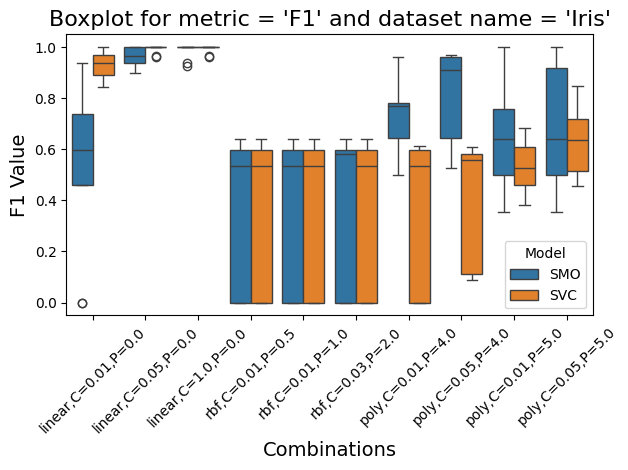

      Dataset  Kernel     C  Param  Run     Value Metric Model
1620  Circles  linear  0.01    0.0    1  0.488889     F1   SMO
1621  Circles  linear  0.05    0.0    1  0.488889     F1   SMO
1622  Circles  linear  1.00    0.0    1  0.344828     F1   SMO
1623  Circles     rbf  0.01    0.5    1  0.488889     F1   SMO
1624  Circles     rbf  0.01    1.0    1  0.488889     F1   SMO
...       ...     ...   ...    ...  ...       ...    ...   ...
2065  Circles     rbf  0.03    2.0    9  0.000000     F1   SVC
2066  Circles    poly  0.01    4.0    9  0.000000     F1   SVC
2067  Circles    poly  0.05    4.0    9  0.000000     F1   SVC
2068  Circles    poly  0.01    5.0    9  0.000000     F1   SVC
2069  Circles    poly  0.05    5.0    9  0.000000     F1   SVC

[180 rows x 8 columns]


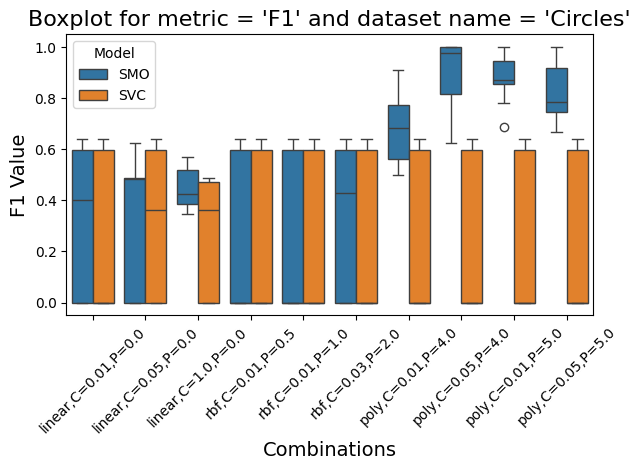

     Dataset  Kernel     C  Param  Run     Value Metric Model
1710   Moons  linear  0.01    0.0    1  0.906250     F1   SMO
1711   Moons  linear  0.05    0.0    1  0.821429     F1   SMO
1712   Moons  linear  1.00    0.0    1  0.777778     F1   SMO
1713   Moons     rbf  0.01    0.5    1  0.618557     F1   SMO
1714   Moons     rbf  0.01    1.0    1  0.618557     F1   SMO
...      ...     ...   ...    ...  ...       ...    ...   ...
2155   Moons     rbf  0.03    2.0    9  0.848485     F1   SVC
2156   Moons    poly  0.01    4.0    9  0.000000     F1   SVC
2157   Moons    poly  0.05    4.0    9  0.000000     F1   SVC
2158   Moons    poly  0.01    5.0    9  0.807018     F1   SVC
2159   Moons    poly  0.05    5.0    9  0.852459     F1   SVC

[180 rows x 8 columns]


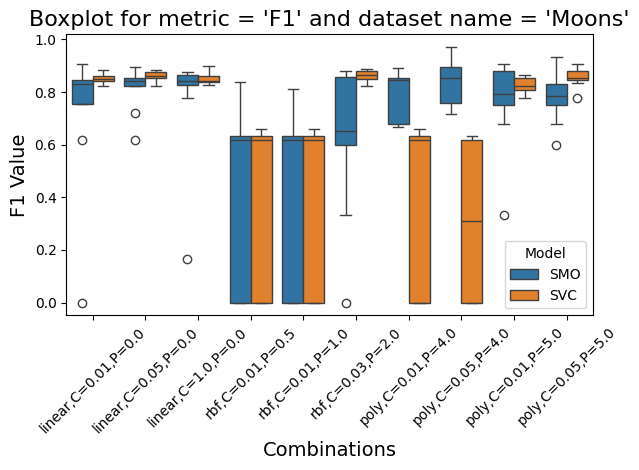

      Dataset  Kernel     C  Param  Run  Value           Metric Model
2160  Spirals  linear  0.01    0.0    1   12.0  Support vectors   SMO
2161  Spirals  linear  0.05    0.0    1   12.0  Support vectors   SMO
2162  Spirals  linear  1.00    0.0    1   17.0  Support vectors   SMO
2163  Spirals     rbf  0.01    0.5    1    6.0  Support vectors   SMO
2164  Spirals     rbf  0.01    1.0    1    6.0  Support vectors   SMO
...       ...     ...   ...    ...  ...    ...              ...   ...
2605  Spirals     rbf  0.03    2.0    9  131.0  Support vectors   SVC
2606  Spirals    poly  0.01    4.0    9  131.0  Support vectors   SVC
2607  Spirals    poly  0.05    4.0    9  124.0  Support vectors   SVC
2608  Spirals    poly  0.01    5.0    9  119.0  Support vectors   SVC
2609  Spirals    poly  0.05    5.0    9  115.0  Support vectors   SVC

[180 rows x 8 columns]


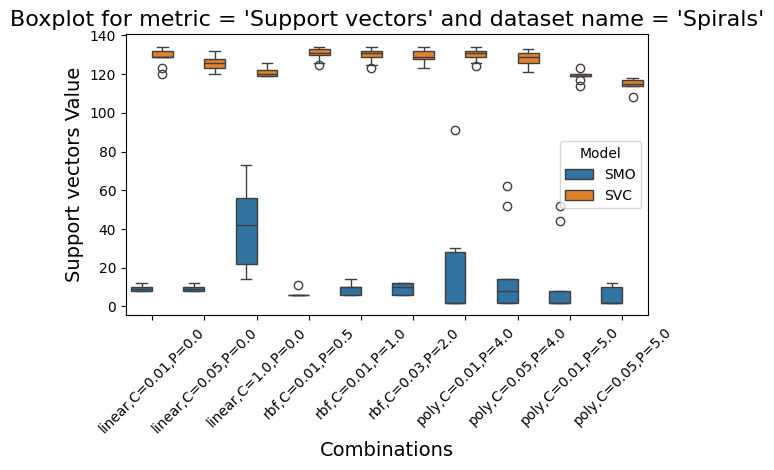

     Dataset  Kernel     C  Param  Run  Value           Metric Model
2250    Iris  linear  0.01    0.0    1    6.0  Support vectors   SMO
2251    Iris  linear  0.05    0.0    1    6.0  Support vectors   SMO
2252    Iris  linear  1.00    0.0    1    5.0  Support vectors   SMO
2253    Iris     rbf  0.01    0.5    1    6.0  Support vectors   SMO
2254    Iris     rbf  0.01    1.0    1    8.0  Support vectors   SMO
...      ...     ...   ...    ...  ...    ...              ...   ...
2695    Iris     rbf  0.03    2.0    9   60.0  Support vectors   SVC
2696    Iris    poly  0.01    4.0    9   61.0  Support vectors   SVC
2697    Iris    poly  0.05    4.0    9   61.0  Support vectors   SVC
2698    Iris    poly  0.01    5.0    9   57.0  Support vectors   SVC
2699    Iris    poly  0.05    5.0    9   47.0  Support vectors   SVC

[180 rows x 8 columns]


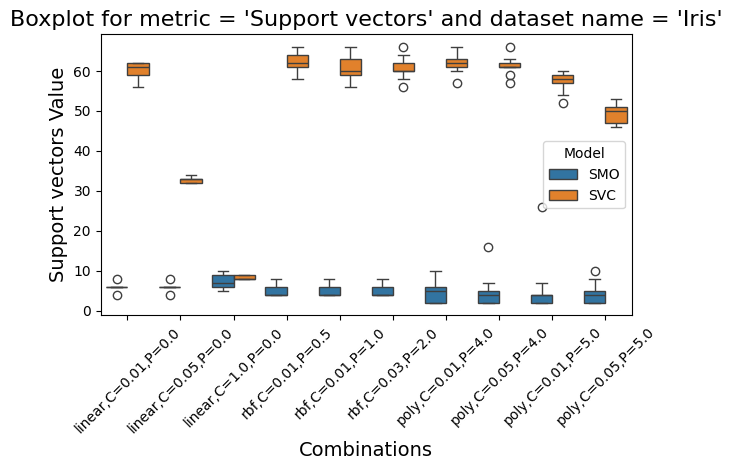

      Dataset  Kernel     C  Param  Run  Value           Metric Model
2340  Circles  linear  0.01    0.0    1    4.0  Support vectors   SMO
2341  Circles  linear  0.05    0.0    1    4.0  Support vectors   SMO
2342  Circles  linear  1.00    0.0    1    4.0  Support vectors   SMO
2343  Circles     rbf  0.01    0.5    1   10.0  Support vectors   SMO
2344  Circles     rbf  0.01    1.0    1   10.0  Support vectors   SMO
...       ...     ...   ...    ...  ...    ...              ...   ...
2785  Circles     rbf  0.03    2.0    9   62.0  Support vectors   SVC
2786  Circles    poly  0.01    4.0    9   60.0  Support vectors   SVC
2787  Circles    poly  0.05    4.0    9   62.0  Support vectors   SVC
2788  Circles    poly  0.01    5.0    9   63.0  Support vectors   SVC
2789  Circles    poly  0.05    5.0    9   63.0  Support vectors   SVC

[180 rows x 8 columns]


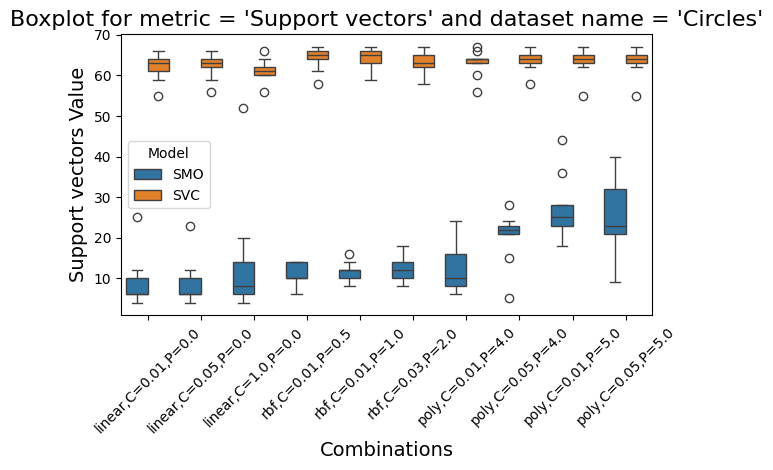

     Dataset  Kernel     C  Param  Run  Value           Metric Model
2430   Moons  linear  0.01    0.0    1   26.0  Support vectors   SMO
2431   Moons  linear  0.05    0.0    1   26.0  Support vectors   SMO
2432   Moons  linear  1.00    0.0    1   21.0  Support vectors   SMO
2433   Moons     rbf  0.01    0.5    1   10.0  Support vectors   SMO
2434   Moons     rbf  0.01    1.0    1   10.0  Support vectors   SMO
...      ...     ...   ...    ...  ...    ...              ...   ...
2875   Moons     rbf  0.03    2.0    9  132.0  Support vectors   SVC
2876   Moons    poly  0.01    4.0    9  133.0  Support vectors   SVC
2877   Moons    poly  0.05    4.0    9  133.0  Support vectors   SVC
2878   Moons    poly  0.01    5.0    9  102.0  Support vectors   SVC
2879   Moons    poly  0.05    5.0    9   73.0  Support vectors   SVC

[180 rows x 8 columns]


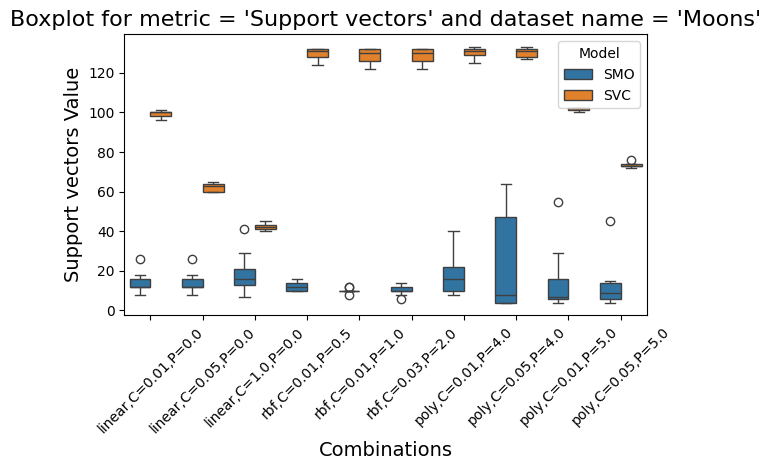

In [50]:
import seaborn as sns


metrics_to_plot = ['Accuracy', 'AUROC', 'F1', 'Support vectors']
dataset_names = df_long['Dataset'].unique()
for metric in metrics_to_plot:
    for dataset_name in dataset_names:
        metric_data = df_long[(df_long['Metric'] == metric) & (df_long['Dataset'] == dataset_name)].copy(deep=True)
        print(metric_data)
        metric_data['Kernel_C_Param'] = metric_data['Kernel'] + ',C=' + metric_data['C'].astype(str) + ',P=' + metric_data['Param'].astype(str)
        
        ax = sns.boxplot(
            data=metric_data,
            x='Kernel_C_Param',       
            y='Value',        
            hue='Model',      
        )
        
        for patch in ax.artists:
            med = patch.get_paths()[0].vertices[:, 1].mean()  
            x_coords = patch.get_x() + patch.get_width() / 2  
            ax.plot([x_coords - 0.1, x_coords + 0.1], [med, med], color='red', lw=2)
        
        plt.title(f"Boxplot for {metric = } and dataset name = '{dataset_name}'", fontsize=16)
        plt.xlabel("Combinations", fontsize=14)
        plt.ylabel(f"{metric} Value", fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plt.show()

### Тестирование на линейных данных

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score


random_state = 42
n = 200
np.random.seed(random_state)
X, y = linear_test(n)
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=random_state)
accuracies = []
for i, (train_idx, test_idx) in enumerate(rkf.split(X)):
    print(f"Fold {i}:")
    model = KeerthiSmo(X[train_idx], y[train_idx], C=1)
    model.train()
    print(f'{model.support_alpha.shape = }')
    y_pred = model.predict(X[test_idx])
    y_test = y[test_idx]
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy}')

Fold 0:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (5,)
Accuracy: 0.925
Fold 1:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (7,)
Accuracy: 0.9
Fold 2:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (6,)
Accuracy: 0.95
Fold 3:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (23,)
Accuracy: 0.875
Fold 4:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (6,)
Accuracy: 1.0
Fold 5:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (4,)
Accuracy: 0.95
Fold 6:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (6,)
Accuracy: 0.95
Fold 7:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (9,)
Accuracy: 0.975
Fold 8:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (9,)
Accuracy: 1.0
Fold 9:
in train
self.alpha.shape = (160,)
model.support_alpha.shape = (4,)
Accuracy: 0.9


0.9425000000000001 0.04038873605350877


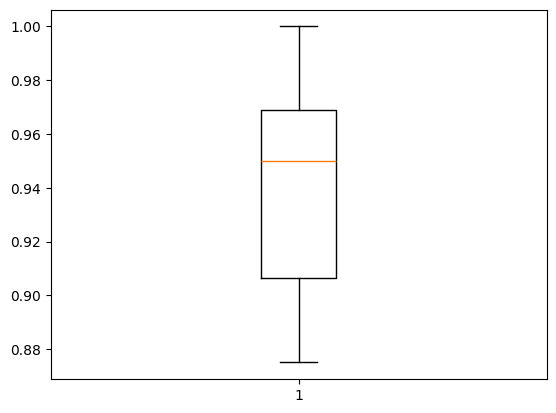

In [ ]:
accuracies = np.array(accuracies)
acc_df = pd.DataFrame({'Accuracy': accuracies})
acc_df.to_csv(f'./data/linear_{time.time_ns()}.csv')

print(accuracies.mean(), accuracies.std())
plt.boxplot(accuracies)
plt.show()

### Овалы

In [ ]:
random_state = 42
n = 200
np.random.seed(random_state)
X, y = nonlinear_test(n)
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=random_state)
accuracies = []
for i, (train_idx, test_idx) in enumerate(rkf.split(X)):
    print(f"Fold {i}:")
    model = KeerthiSmo(X[train_idx], y[train_idx], C=1)
    
    model.train()
    print(f'{model.support_alpha.shape = }')
    y_pred = model.predict(X[test_idx])
    y_test = y[test_idx]
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy: {accuracy}')

Fold 0:
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
model.support_alpha.shape = (22,)
Accuracy: 0.525
Fold 1:
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter = 120
self.iter = 130
self.iter = 140
self.iter = 150
self.iter = 160
self.iter = 170
self.iter = 180
self.iter = 190
self.iter = 200
self.alpha.shape = (160,)
model.support_alpha.shape = (13,)
Accuracy: 0.35
Fold 2:
in train
self.iter = 10
self.iter = 20
self.iter = 30
self.iter = 40
self.iter = 50
self.iter = 60
self.iter = 70
self.iter = 80
self.iter = 90
self.iter = 100
self.iter = 110
self.iter

KeyboardInterrupt: 